In [19]:
from keras.models import load_model,Sequential
from keras.layers import Input, Dense, LSTM,Dropout
from keras.utils import to_categorical
from keras.callbacks import Callback, ModelCheckpoint


import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.metrics import confusion_matrix

def signal_to_catagorical(data):
  data.loc[data['Signal'] == 'wait ot hold', 'Signal'] = 'wait or hold'
  data.loc[data['Signal'] == 'buy', 'Signal'] = 0
  data.loc[data['Signal'] == 'sell', 'Signal'] = 1 
  data.loc[data['Signal'] == 'wait or hold', 'Signal'] = 2 
  return data

def add_shift_day(data,day):
  r_list = []
  for i in range(day,len(data)):#Number mean day to shift
    r_list.append(data[i-day : i])
  return np.array(r_list)



In [20]:
datalist = [f for f in glob.glob("../../Dataset/*.csv")]
print('have stock = ',len(datalist))


have stock =  76


In [21]:
data = pd.read_csv(datalist[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3023 non-null   object 
 1   High            3023 non-null   float64
 2   Low             3023 non-null   float64
 3   Open            3023 non-null   float64
 4   Close           3023 non-null   float64
 5   Volume          3023 non-null   int64  
 6   Adj Close       3023 non-null   float64
 7   Signal          3023 non-null   object 
 8   MACD-1          3023 non-null   float64
 9   SIGNAL LINE1    3023 non-null   float64
 10  MACD-2          3023 non-null   float64
 11  SIGNAL LINE2    3023 non-null   float64
 12  plusDI          3023 non-null   float64
 13  minusDI         3023 non-null   float64
 14  adx             3023 non-null   float64
 15  storsi          3023 non-null   float64
 16  %K              3023 non-null   float64
 17  %D              3023 non-null   f

In [22]:
#validation 
val_list = []
for val_name in range(71,74):
    df = pd.read_csv(datalist[val_name])
    val_x = df
    # val_x = add_shift_day(val_x,30)
    val_list.append(val_x)

#test
test_list = []
for test_name in range(74,76):
    df = pd.read_csv(datalist[test_name])
    test = df
    # test = add_shift_day(test,30)
    test_list.append(test)

In [15]:
model = Sequential()
model.add(LSTM(100, input_shape=((30,7)),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

checkpoint = ModelCheckpoint('lstm_model_trend3.h5',
                               verbose=1,
                               monitor='val_acc',
                               mode='max',
                               save_best_only = True)



Epoch 1/100
93/93 [==============================] - 4s 48ms/step - loss: 1.2923 - acc: 0.6770: 3s - loss: 1.6475 - a - ETA: 2s 
Epoch 2/100
93/93 [==============================] - 4s 48ms/step - loss: 0.6807 - acc: 0.7310
Epoch 3/100
93/93 [==============================] - 4s 47ms/step - loss: 0.5432 - acc: 0.7854
Epoch 4/100
93/93 [==============================] - 4s 46ms/step - loss: 0.4736 - acc: 0.8063: 0s - loss: 0.4825 - acc
Epoch 5/100
93/93 [==============================] - 5s 50ms/step - loss: 0.4132 - acc: 0.8394
Epoch 6/100
93/93 [==============================] - 5s 52ms/step - loss: 0.3781 - acc: 0.8505
Epoch 7/100
93/93 [==============================] - 5s 55ms/step - loss: 0.3367 - acc: 0.8707
Epoch 8/100
93/93 [==============================] - 5s 52ms/step - loss: 0.3004 - acc: 0.8869
Epoch 9/100
93/93 [==============================] - 6s 62ms/step - loss: 0.2567 - acc: 0.9082
Epoch 10/100
93/93 [==============================] - 5s 55ms/step - loss: 0.2352 - ac

93/93 [==============================] - 5s 55ms/step - loss: 0.0131 - acc: 0.9956
Epoch 86/100
93/93 [==============================] - 5s 51ms/step - loss: 0.0136 - acc: 0.9943
Epoch 87/100
93/93 [==============================] - 6s 67ms/step - loss: 0.0222 - acc: 0.9926
Epoch 88/100
93/93 [==============================] - 5s 50ms/step - loss: 0.0175 - acc: 0.9936
Epoch 89/100
93/93 [==============================] - 5s 52ms/step - loss: 0.0178 - acc: 0.9943
Epoch 90/100
93/93 [==============================] - 7s 76ms/step - loss: 0.0115 - acc: 0.9956
Epoch 91/100
93/93 [==============================] - 5s 51ms/step - loss: 0.0244 - acc: 0.9906
Epoch 92/100
93/93 [==============================] - 6s 67ms/step - loss: 0.0315 - acc: 0.9892
Epoch 93/100
93/93 [==============================] - 5s 50ms/step - loss: 0.0242 - acc: 0.9919
Epoch 94/100
93/93 [==============================] - 5s 49ms/step - loss: 0.0187 - acc: 0.9916
Epoch 95/100
93/93 [==============================] -

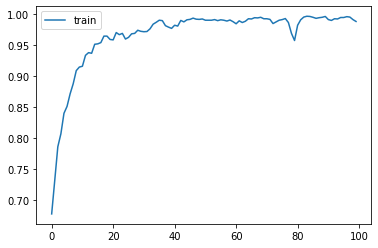

Epoch 1/100
70/70 [==============================] - 4s 53ms/step - loss: 1.5826 - acc: 0.6550
Epoch 2/100
70/70 [==============================] - 3s 49ms/step - loss: 0.6421 - acc: 0.7641
Epoch 3/100
70/70 [==============================] - 3s 50ms/step - loss: 0.4343 - acc: 0.8216
Epoch 4/100
70/70 [==============================] - 5s 72ms/step - loss: 0.3780 - acc: 0.8370
Epoch 5/100
70/70 [==============================] - 4s 62ms/step - loss: 0.3183 - acc: 0.8687
Epoch 6/100
70/70 [==============================] - 5s 67ms/step - loss: 0.2855 - acc: 0.8832
Epoch 7/100
70/70 [==============================] - 5s 65ms/step - loss: 0.2394 - acc: 0.9058
Epoch 8/100
70/70 [==============================] - 5s 76ms/step - loss: 0.2230 - acc: 0.9090
Epoch 9/100
70/70 [==============================] - 4s 55ms/step - loss: 0.1898 - acc: 0.9212
Epoch 10/100
70/70 [==============================] - 4s 54ms/step - loss: 0.1689 - acc: 0.9407
Epoch 11/100
70/70 [=============================

70/70 [==============================] - 5s 68ms/step - loss: 0.0140 - acc: 0.9973
Epoch 86/100
70/70 [==============================] - 3s 50ms/step - loss: 0.0116 - acc: 0.9964
Epoch 87/100
70/70 [==============================] - 4s 50ms/step - loss: 0.0122 - acc: 0.9955
Epoch 88/100
70/70 [==============================] - 5s 68ms/step - loss: 0.0142 - acc: 0.9955
Epoch 89/100
70/70 [==============================] - 3s 50ms/step - loss: 0.0146 - acc: 0.9959
Epoch 90/100
70/70 [==============================] - 4s 50ms/step - loss: 0.0226 - acc: 0.9923
Epoch 91/100
70/70 [==============================] - 4s 51ms/step - loss: 0.0209 - acc: 0.9923
Epoch 92/100
70/70 [==============================] - 5s 67ms/step - loss: 0.0265 - acc: 0.9905
Epoch 93/100
70/70 [==============================] - 4s 51ms/step - loss: 0.0242 - acc: 0.9932
Epoch 94/100
70/70 [==============================] - 4s 51ms/step - loss: 0.0340 - acc: 0.9896
Epoch 95/100
70/70 [==============================] -

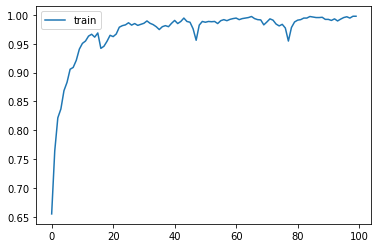

Epoch 1/100
77/77 [==============================] - 6s 76ms/step - loss: 1.0833 - acc: 0.7568
Epoch 2/100
77/77 [==============================] - 6s 73ms/step - loss: 0.5205 - acc: 0.8174
Epoch 3/100
77/77 [==============================] - 4s 57ms/step - loss: 0.3830 - acc: 0.8479: 1s - los
Epoch 4/100
77/77 [==============================] - 4s 57ms/step - loss: 0.3032 - acc: 0.8817
Epoch 5/100
77/77 [==============================] - 6s 75ms/step - loss: 0.2696 - acc: 0.8874
Epoch 6/100
77/77 [==============================] - 5s 59ms/step - loss: 0.2336 - acc: 0.9122: 3s -
Epoch 7/100
77/77 [==============================] - 4s 58ms/step - loss: 0.2064 - acc: 0.9187
Epoch 8/100
77/77 [==============================] - 5s 61ms/step - loss: 0.1683 - acc: 0.9402
Epoch 9/100
77/77 [==============================] - 5s 59ms/step - loss: 0.1411 - acc: 0.9553
Epoch 10/100
77/77 [==============================] - 4s 52ms/step - loss: 0.1270 - acc: 0.9553
Epoch 11/100
77/77 [=============

77/77 [==============================] - 5s 67ms/step - loss: 0.0447 - acc: 0.9911
Epoch 87/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0256 - acc: 0.9902
Epoch 88/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0254 - acc: 0.9911
Epoch 89/100
77/77 [==============================] - 5s 62ms/step - loss: 0.0161 - acc: 0.9931
Epoch 90/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0074 - acc: 0.9988
Epoch 91/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0066 - acc: 0.9988
Epoch 92/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0074 - acc: 0.9976
Epoch 93/100
77/77 [==============================] - 5s 65ms/step - loss: 0.0069 - acc: 0.9980
Epoch 94/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0081 - acc: 0.9980
Epoch 95/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0084 - acc: 0.9976
Epoch 96/100
77/77 [==============================] -

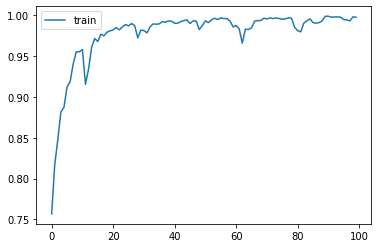

Epoch 1/100
77/77 [==============================] - 4s 50ms/step - loss: 0.5863 - acc: 0.8821
Epoch 2/100
77/77 [==============================] - 5s 64ms/step - loss: 0.3052 - acc: 0.9211
Epoch 3/100
77/77 [==============================] - 4s 51ms/step - loss: 0.2036 - acc: 0.9296
Epoch 4/100
77/77 [==============================] - 4s 51ms/step - loss: 0.1759 - acc: 0.9370
Epoch 5/100
77/77 [==============================] - 4s 49ms/step - loss: 0.1532 - acc: 0.9471
Epoch 6/100
77/77 [==============================] - 5s 66ms/step - loss: 0.1206 - acc: 0.9561
Epoch 7/100
77/77 [==============================] - 4s 49ms/step - loss: 0.1019 - acc: 0.9630
Epoch 8/100
77/77 [==============================] - 4s 49ms/step - loss: 0.1014 - acc: 0.9626
Epoch 9/100
77/77 [==============================] - 5s 66ms/step - loss: 0.0951 - acc: 0.9638
Epoch 10/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0735 - acc: 0.9715
Epoch 11/100
77/77 [=============================

77/77 [==============================] - 4s 50ms/step - loss: 0.0081 - acc: 0.9984
Epoch 87/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0070 - acc: 0.9976
Epoch 88/100
77/77 [==============================] - 5s 66ms/step - loss: 0.0125 - acc: 0.9951
Epoch 89/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0107 - acc: 0.9955
Epoch 90/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0090 - acc: 0.9959
Epoch 91/100
77/77 [==============================] - 5s 66ms/step - loss: 0.0605 - acc: 0.9833
Epoch 92/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0306 - acc: 0.9894
Epoch 93/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0120 - acc: 0.9967
Epoch 94/100
77/77 [==============================] - 5s 63ms/step - loss: 0.0141 - acc: 0.9967
Epoch 95/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0129 - acc: 0.9959
Epoch 96/100
77/77 [==============================] -

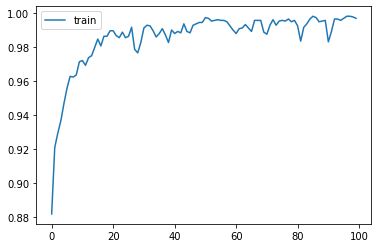

Epoch 1/100
94/94 [==============================] - 6s 66ms/step - loss: 1.1061 - acc: 0.7122
Epoch 2/100
94/94 [==============================] - 5s 50ms/step - loss: 0.6857 - acc: 0.7252
Epoch 3/100
94/94 [==============================] - 6s 63ms/step - loss: 0.6359 - acc: 0.7472
Epoch 4/100
94/94 [==============================] - 5s 49ms/step - loss: 0.6085 - acc: 0.7472
Epoch 5/100
94/94 [==============================] - 5s 50ms/step - loss: 0.5654 - acc: 0.7508
Epoch 6/100
94/94 [==============================] - 6s 63ms/step - loss: 0.5366 - acc: 0.7602
Epoch 7/100
94/94 [==============================] - 5s 51ms/step - loss: 0.5128 - acc: 0.7668
Epoch 8/100
94/94 [==============================] - 5s 50ms/step - loss: 0.4903 - acc: 0.7868
Epoch 9/100
94/94 [==============================] - 6s 69ms/step - loss: 0.4584 - acc: 0.7941
Epoch 10/100
94/94 [==============================] - 5s 56ms/step - loss: 0.4416 - acc: 0.8071
Epoch 11/100
94/94 [=============================

94/94 [==============================] - 6s 59ms/step - loss: 0.0781 - acc: 0.9704
Epoch 87/100
94/94 [==============================] - 4s 48ms/step - loss: 0.0447 - acc: 0.9840
Epoch 88/100
94/94 [==============================] - 6s 64ms/step - loss: 0.0258 - acc: 0.9927
Epoch 89/100
94/94 [==============================] - 5s 49ms/step - loss: 0.0207 - acc: 0.9943
Epoch 90/100
94/94 [==============================] - 5s 49ms/step - loss: 0.0252 - acc: 0.9923
Epoch 91/100
94/94 [==============================] - 6s 62ms/step - loss: 0.0210 - acc: 0.9930
Epoch 92/100
94/94 [==============================] - 4s 48ms/step - loss: 0.0220 - acc: 0.9940
Epoch 93/100
94/94 [==============================] - 5s 48ms/step - loss: 0.1511 - acc: 0.9654
Epoch 94/100
94/94 [==============================] - 6s 62ms/step - loss: 0.0670 - acc: 0.9773
Epoch 95/100
94/94 [==============================] - 4s 48ms/step - loss: 0.0351 - acc: 0.9900: 0s - loss: 0.0361 - acc: 0.9
Epoch 96/100
94/94 [===

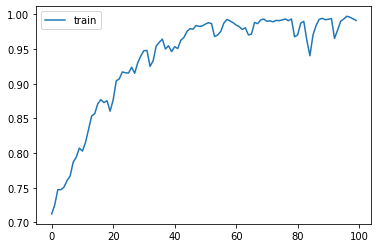

Epoch 1/100
77/77 [==============================] - 4s 47ms/step - loss: 1.1993 - acc: 0.7113
Epoch 2/100
77/77 [==============================] - 4s 57ms/step - loss: 0.4908 - acc: 0.7898
Epoch 3/100
77/77 [==============================] - 4s 56ms/step - loss: 0.4213 - acc: 0.8109
Epoch 4/100
77/77 [==============================] - 4s 48ms/step - loss: 0.3604 - acc: 0.8345
Epoch 5/100
77/77 [==============================] - 4s 48ms/step - loss: 0.3165 - acc: 0.8516
Epoch 6/100
77/77 [==============================] - 5s 65ms/step - loss: 0.2884 - acc: 0.8654
Epoch 7/100
77/77 [==============================] - 4s 48ms/step - loss: 0.2524 - acc: 0.8821
Epoch 8/100
77/77 [==============================] - 4s 47ms/step - loss: 0.2351 - acc: 0.8959
Epoch 9/100
77/77 [==============================] - 4s 55ms/step - loss: 0.2150 - acc: 0.9166
Epoch 10/100
77/77 [==============================] - 4s 57ms/step - loss: 0.1923 - acc: 0.9260
Epoch 11/100
77/77 [=============================

77/77 [==============================] - 4s 48ms/step - loss: 0.0239 - acc: 0.9923
Epoch 86/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0109 - acc: 0.9967
Epoch 87/100
77/77 [==============================] - 5s 63ms/step - loss: 0.0080 - acc: 0.9976
Epoch 88/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0111 - acc: 0.9980
Epoch 89/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0084 - acc: 0.9967: 1s - loss: 0.
Epoch 90/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0071 - acc: 0.9984
Epoch 91/100
77/77 [==============================] - 5s 66ms/step - loss: 0.0061 - acc: 0.9980
Epoch 92/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0063 - acc: 0.9972
Epoch 93/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0080 - acc: 0.9984
Epoch 94/100
77/77 [==============================] - 5s 65ms/step - loss: 0.0074 - acc: 0.9976
Epoch 95/100
77/77 [==================

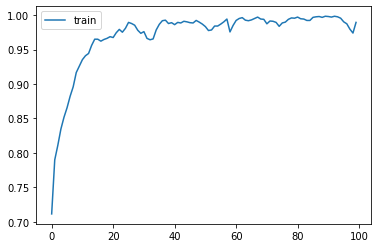

Epoch 1/100
77/77 [==============================] - 5s 64ms/step - loss: 1.0256 - acc: 0.7401
Epoch 2/100
77/77 [==============================] - 4s 48ms/step - loss: 0.4933 - acc: 0.8089
Epoch 3/100
77/77 [==============================] - 4s 48ms/step - loss: 0.3909 - acc: 0.8438
Epoch 4/100
77/77 [==============================] - 5s 66ms/step - loss: 0.3364 - acc: 0.8625
Epoch 5/100
77/77 [==============================] - 4s 49ms/step - loss: 0.2698 - acc: 0.8951
Epoch 6/100
77/77 [==============================] - 4s 48ms/step - loss: 0.2235 - acc: 0.9105
Epoch 7/100
77/77 [==============================] - 4s 47ms/step - loss: 0.1938 - acc: 0.9252
Epoch 8/100
77/77 [==============================] - 5s 64ms/step - loss: 0.1686 - acc: 0.9349
Epoch 9/100
77/77 [==============================] - 4s 48ms/step - loss: 0.1520 - acc: 0.9418
Epoch 10/100
77/77 [==============================] - 4s 48ms/step - loss: 0.1291 - acc: 0.9524
Epoch 11/100
77/77 [=============================

77/77 [==============================] - 4s 47ms/step - loss: 0.0148 - acc: 0.9943
Epoch 87/100
77/77 [==============================] - 5s 61ms/step - loss: 0.0118 - acc: 0.9951
Epoch 88/100
77/77 [==============================] - 4s 52ms/step - loss: 0.0396 - acc: 0.9894
Epoch 89/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0110 - acc: 0.9963
Epoch 90/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0165 - acc: 0.9951
Epoch 91/100
77/77 [==============================] - 5s 64ms/step - loss: 0.0192 - acc: 0.9939
Epoch 92/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0177 - acc: 0.9931
Epoch 93/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0131 - acc: 0.9951
Epoch 94/100
77/77 [==============================] - 5s 65ms/step - loss: 0.0060 - acc: 0.9984
Epoch 95/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0066 - acc: 0.9980
Epoch 96/100
77/77 [==============================] -

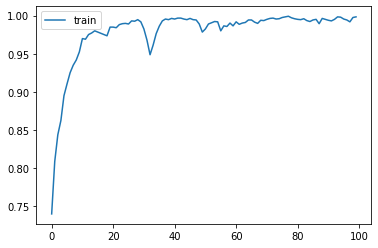

Epoch 1/100
77/77 [==============================] - 5s 65ms/step - loss: 0.8780 - acc: 0.8040
Epoch 2/100
77/77 [==============================] - 4s 48ms/step - loss: 0.4020 - acc: 0.8560
Epoch 3/100
77/77 [==============================] - 4s 48ms/step - loss: 0.2935 - acc: 0.8926
Epoch 4/100
77/77 [==============================] - 5s 64ms/step - loss: 0.2368 - acc: 0.9174
Epoch 5/100
77/77 [==============================] - 4s 48ms/step - loss: 0.2044 - acc: 0.9183
Epoch 6/100
77/77 [==============================] - 4s 49ms/step - loss: 0.1652 - acc: 0.9349
Epoch 7/100
77/77 [==============================] - 4s 55ms/step - loss: 0.1442 - acc: 0.9475
Epoch 8/100
77/77 [==============================] - 4s 58ms/step - loss: 0.1283 - acc: 0.9496
Epoch 9/100
77/77 [==============================] - 4s 48ms/step - loss: 0.1028 - acc: 0.9618
Epoch 10/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0889 - acc: 0.9683
Epoch 11/100
77/77 [=============================

77/77 [==============================] - 4s 48ms/step - loss: 0.0103 - acc: 0.9967
Epoch 86/100
77/77 [==============================] - 5s 64ms/step - loss: 0.0070 - acc: 0.9976
Epoch 87/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0096 - acc: 0.9972
Epoch 88/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0114 - acc: 0.9959
Epoch 89/100
77/77 [==============================] - 5s 64ms/step - loss: 0.0087 - acc: 0.9967
Epoch 90/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0073 - acc: 0.9972
Epoch 91/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0069 - acc: 0.9967
Epoch 92/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0068 - acc: 0.9980
Epoch 93/100
77/77 [==============================] - 5s 66ms/step - loss: 0.0061 - acc: 0.9984
Epoch 94/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0057 - acc: 0.9984
Epoch 95/100
77/77 [==============================] -

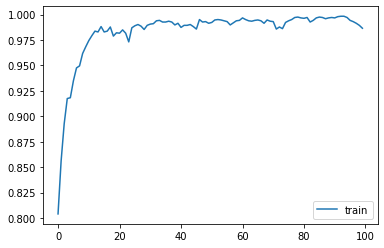

Epoch 1/100
77/77 [==============================] - 4s 47ms/step - loss: 0.7175 - acc: 0.8211
Epoch 2/100
77/77 [==============================] - 4s 48ms/step - loss: 0.3409 - acc: 0.8971
Epoch 3/100
77/77 [==============================] - 5s 66ms/step - loss: 0.2793 - acc: 0.9089
Epoch 4/100
77/77 [==============================] - 4s 47ms/step - loss: 0.2400 - acc: 0.9223
Epoch 5/100
77/77 [==============================] - 4s 48ms/step - loss: 0.2070 - acc: 0.9256
Epoch 6/100
77/77 [==============================] - 5s 65ms/step - loss: 0.1827 - acc: 0.9333
Epoch 7/100
77/77 [==============================] - 4s 48ms/step - loss: 0.1603 - acc: 0.9382
Epoch 8/100
77/77 [==============================] - 4s 47ms/step - loss: 0.1352 - acc: 0.9512
Epoch 9/100
77/77 [==============================] - 4s 55ms/step - loss: 0.1334 - acc: 0.9500
Epoch 10/100
77/77 [==============================] - 5s 59ms/step - loss: 0.1049 - acc: 0.9585
Epoch 11/100
77/77 [=============================

77/77 [==============================] - 4s 50ms/step - loss: 0.0074 - acc: 0.9980
Epoch 86/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0070 - acc: 0.9980
Epoch 87/100
77/77 [==============================] - 4s 52ms/step - loss: 0.0157 - acc: 0.9947
Epoch 88/100
77/77 [==============================] - 5s 61ms/step - loss: 0.0111 - acc: 0.9959
Epoch 89/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0094 - acc: 0.9976
Epoch 90/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0034 - acc: 0.9992
Epoch 91/100
77/77 [==============================] - 5s 65ms/step - loss: 0.0035 - acc: 0.9988
Epoch 92/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0035 - acc: 0.9980
Epoch 93/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0023 - acc: 0.9992
Epoch 94/100
77/77 [==============================] - 4s 52ms/step - loss: 0.0035 - acc: 0.9992
Epoch 95/100
77/77 [==============================] -

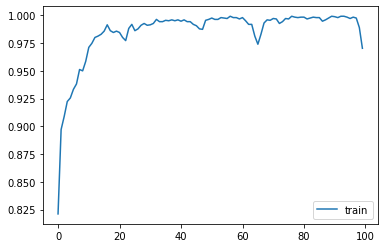

Epoch 1/100
86/86 [==============================] - 6s 64ms/step - loss: 0.9591 - acc: 0.7331: 1s - loss: 1.0297 - 
Epoch 2/100
86/86 [==============================] - 4s 47ms/step - loss: 0.4299 - acc: 0.8169
Epoch 3/100
86/86 [==============================] - 4s 48ms/step - loss: 0.3302 - acc: 0.8572
Epoch 4/100
86/86 [==============================] - 5s 64ms/step - loss: 0.2728 - acc: 0.8869
Epoch 5/100
86/86 [==============================] - 4s 48ms/step - loss: 0.2498 - acc: 0.8982
Epoch 6/100
86/86 [==============================] - 4s 47ms/step - loss: 0.2166 - acc: 0.9118
Epoch 7/100
86/86 [==============================] - 5s 63ms/step - loss: 0.1923 - acc: 0.9216
Epoch 8/100
86/86 [==============================] - 4s 47ms/step - loss: 0.1601 - acc: 0.9418
Epoch 9/100
86/86 [==============================] - 4s 47ms/step - loss: 0.1422 - acc: 0.9491
Epoch 10/100
86/86 [==============================] - 6s 64ms/step - loss: 0.1267 - acc: 0.9546
Epoch 11/100
86/86 [=======

86/86 [==============================] - 3s 35ms/step - loss: 0.0117 - acc: 0.9956
Epoch 86/100
86/86 [==============================] - 3s 36ms/step - loss: 0.0138 - acc: 0.9952
Epoch 87/100
86/86 [==============================] - 3s 36ms/step - loss: 0.0077 - acc: 0.9978
Epoch 88/100
86/86 [==============================] - 3s 35ms/step - loss: 0.0079 - acc: 0.9978
Epoch 89/100
86/86 [==============================] - 3s 35ms/step - loss: 0.0102 - acc: 0.9974
Epoch 90/100
86/86 [==============================] - 3s 34ms/step - loss: 0.0176 - acc: 0.9945
Epoch 91/100
86/86 [==============================] - 3s 33ms/step - loss: 0.0675 - acc: 0.9839
Epoch 92/100
86/86 [==============================] - 3s 35ms/step - loss: 0.0270 - acc: 0.9901
Epoch 93/100
86/86 [==============================] - 3s 35ms/step - loss: 0.0123 - acc: 0.9952
Epoch 94/100
86/86 [==============================] - 3s 35ms/step - loss: 0.0140 - acc: 0.9949
Epoch 95/100
86/86 [==============================] -

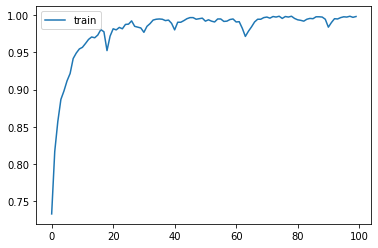

Epoch 1/100
76/76 [==============================] - 3s 35ms/step - loss: 1.6449 - acc: 0.6243
Epoch 2/100
76/76 [==============================] - 3s 35ms/step - loss: 0.8701 - acc: 0.6255
Epoch 3/100
76/76 [==============================] - 3s 33ms/step - loss: 0.6289 - acc: 0.7070
Epoch 4/100
76/76 [==============================] - 2s 33ms/step - loss: 0.5215 - acc: 0.7585
Epoch 5/100
76/76 [==============================] - 3s 34ms/step - loss: 0.4701 - acc: 0.7993
Epoch 6/100
76/76 [==============================] - 3s 35ms/step - loss: 0.4218 - acc: 0.8134
Epoch 7/100
76/76 [==============================] - 3s 35ms/step - loss: 0.3751 - acc: 0.8400
Epoch 8/100
76/76 [==============================] - 3s 35ms/step - loss: 0.3289 - acc: 0.8587
Epoch 9/100
76/76 [==============================] - 3s 35ms/step - loss: 0.3214 - acc: 0.8687
Epoch 10/100
76/76 [==============================] - 3s 35ms/step - loss: 0.2803 - acc: 0.8815
Epoch 11/100
76/76 [=============================

76/76 [==============================] - 3s 35ms/step - loss: 0.0502 - acc: 0.9838
Epoch 87/100
76/76 [==============================] - 2s 33ms/step - loss: 0.0416 - acc: 0.9875
Epoch 88/100
76/76 [==============================] - 2s 33ms/step - loss: 0.0512 - acc: 0.9867
Epoch 89/100
76/76 [==============================] - 3s 36ms/step - loss: 0.0331 - acc: 0.9900
Epoch 90/100
76/76 [==============================] - 3s 35ms/step - loss: 0.0249 - acc: 0.9921
Epoch 91/100
76/76 [==============================] - 3s 36ms/step - loss: 0.0170 - acc: 0.9933
Epoch 92/100
76/76 [==============================] - 3s 36ms/step - loss: 0.0193 - acc: 0.9929
Epoch 93/100
76/76 [==============================] - 3s 36ms/step - loss: 0.0205 - acc: 0.9933
Epoch 94/100
76/76 [==============================] - 3s 33ms/step - loss: 0.0195 - acc: 0.9933
Epoch 95/100
76/76 [==============================] - 2s 33ms/step - loss: 0.0134 - acc: 0.9954
Epoch 96/100
76/76 [==============================] -

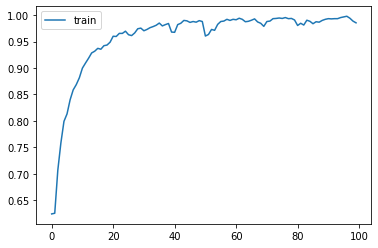

Epoch 1/100
86/86 [==============================] - 3s 34ms/step - loss: 0.5706 - acc: 0.9121
Epoch 2/100
86/86 [==============================] - 3s 33ms/step - loss: 0.3456 - acc: 0.9084
Epoch 3/100
86/86 [==============================] - 3s 35ms/step - loss: 0.2243 - acc: 0.9311
Epoch 4/100
86/86 [==============================] - 3s 36ms/step - loss: 0.1860 - acc: 0.9458
Epoch 5/100
86/86 [==============================] - 3s 36ms/step - loss: 0.1582 - acc: 0.9509
Epoch 6/100
86/86 [==============================] - 3s 36ms/step - loss: 0.1488 - acc: 0.9480
Epoch 7/100
86/86 [==============================] - 3s 36ms/step - loss: 0.1300 - acc: 0.9535
Epoch 8/100
86/86 [==============================] - 3s 34ms/step - loss: 0.1220 - acc: 0.9590
Epoch 9/100
86/86 [==============================] - 3s 33ms/step - loss: 0.1092 - acc: 0.9645
Epoch 10/100
86/86 [==============================] - 3s 35ms/step - loss: 0.0976 - acc: 0.9659
Epoch 11/100
86/86 [=============================

86/86 [==============================] - 3s 36ms/step - loss: 0.0076 - acc: 0.9974
Epoch 87/100
86/86 [==============================] - 3s 36ms/step - loss: 0.0611 - acc: 0.9890
Epoch 88/100
86/86 [==============================] - 3s 35ms/step - loss: 0.0503 - acc: 0.9850
Epoch 89/100
86/86 [==============================] - 3s 33ms/step - loss: 0.1473 - acc: 0.9751
Epoch 90/100
86/86 [==============================] - 3s 34ms/step - loss: 0.0676 - acc: 0.9780
Epoch 91/100
86/86 [==============================] - 3s 36ms/step - loss: 0.0277 - acc: 0.9886
Epoch 92/100
86/86 [==============================] - 3s 36ms/step - loss: 0.0170 - acc: 0.9952
Epoch 93/100
86/86 [==============================] - 3s 36ms/step - loss: 0.0211 - acc: 0.9952
Epoch 94/100
86/86 [==============================] - 3s 36ms/step - loss: 0.0120 - acc: 0.9971
Epoch 95/100
86/86 [==============================] - 3s 34ms/step - loss: 0.0126 - acc: 0.9952
Epoch 96/100
86/86 [==============================] -

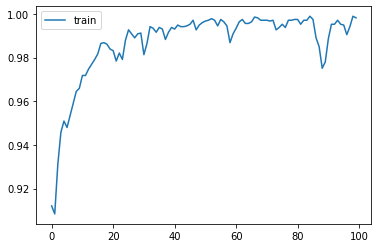

Epoch 1/100
77/77 [==============================] - 3s 36ms/step - loss: 0.5966 - acc: 0.8723
Epoch 2/100
77/77 [==============================] - 3s 33ms/step - loss: 0.3188 - acc: 0.8963
Epoch 3/100
77/77 [==============================] - 3s 33ms/step - loss: 0.2430 - acc: 0.9113
Epoch 4/100
77/77 [==============================] - 3s 35ms/step - loss: 0.1897 - acc: 0.9333
Epoch 5/100
77/77 [==============================] - 3s 36ms/step - loss: 0.1512 - acc: 0.9488
Epoch 6/100
77/77 [==============================] - 3s 36ms/step - loss: 0.1312 - acc: 0.9520
Epoch 7/100
77/77 [==============================] - 3s 36ms/step - loss: 0.1127 - acc: 0.9634
Epoch 8/100
77/77 [==============================] - 3s 36ms/step - loss: 0.1050 - acc: 0.9646
Epoch 9/100
77/77 [==============================] - 3s 35ms/step - loss: 0.0902 - acc: 0.9707
Epoch 10/100
77/77 [==============================] - 3s 33ms/step - loss: 0.0939 - acc: 0.9671
Epoch 11/100
77/77 [=============================

77/77 [==============================] - 3s 35ms/step - loss: 0.0163 - acc: 0.9935
Epoch 87/100
77/77 [==============================] - 3s 33ms/step - loss: 0.0092 - acc: 0.9972
Epoch 88/100
77/77 [==============================] - 3s 34ms/step - loss: 0.0118 - acc: 0.9959
Epoch 89/100
77/77 [==============================] - 3s 36ms/step - loss: 0.0093 - acc: 0.9967
Epoch 90/100
77/77 [==============================] - 3s 36ms/step - loss: 0.0088 - acc: 0.9963
Epoch 91/100
77/77 [==============================] - 3s 36ms/step - loss: 0.0056 - acc: 0.9984
Epoch 92/100
77/77 [==============================] - 3s 36ms/step - loss: 0.0069 - acc: 0.9967
Epoch 93/100
77/77 [==============================] - 3s 36ms/step - loss: 0.0105 - acc: 0.9963
Epoch 94/100
77/77 [==============================] - 3s 33ms/step - loss: 0.0096 - acc: 0.9972
Epoch 95/100
77/77 [==============================] - 3s 33ms/step - loss: 0.0098 - acc: 0.9955
Epoch 96/100
77/77 [==============================] -

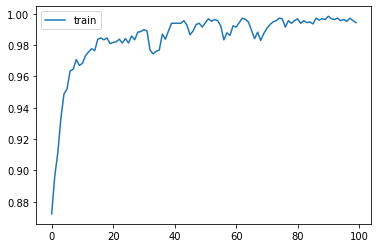

Epoch 1/100
90/90 [==============================] - 3s 35ms/step - loss: 1.4731 - acc: 0.6305
Epoch 2/100
90/90 [==============================] - 3s 33ms/step - loss: 0.7012 - acc: 0.7407
Epoch 3/100
90/90 [==============================] - 3s 34ms/step - loss: 0.5756 - acc: 0.7642
Epoch 4/100
90/90 [==============================] - 3s 36ms/step - loss: 0.5292 - acc: 0.7848
Epoch 5/100
90/90 [==============================] - 3s 37ms/step - loss: 0.5321 - acc: 0.7771
Epoch 6/100
90/90 [==============================] - 3s 37ms/step - loss: 0.4594 - acc: 0.8111
Epoch 7/100
90/90 [==============================] - 3s 36ms/step - loss: 0.4792 - acc: 0.7967
Epoch 8/100
90/90 [==============================] - 3s 33ms/step - loss: 0.4241 - acc: 0.8272
Epoch 9/100
90/90 [==============================] - 3s 34ms/step - loss: 0.4027 - acc: 0.8328
Epoch 10/100
90/90 [==============================] - 3s 36ms/step - loss: 0.3978 - acc: 0.8366
Epoch 11/100
90/90 [=============================

90/90 [==============================] - 3s 35ms/step - loss: 0.0378 - acc: 0.9892
Epoch 87/100
90/90 [==============================] - 3s 33ms/step - loss: 0.0367 - acc: 0.9864
Epoch 88/100
90/90 [==============================] - 3s 34ms/step - loss: 0.0398 - acc: 0.9867
Epoch 89/100
90/90 [==============================] - 3s 36ms/step - loss: 0.0832 - acc: 0.9713
Epoch 90/100
90/90 [==============================] - 3s 36ms/step - loss: 0.1165 - acc: 0.9556
Epoch 91/100
90/90 [==============================] - 3s 36ms/step - loss: 0.0770 - acc: 0.9727
Epoch 92/100
90/90 [==============================] - 3s 34ms/step - loss: 0.0461 - acc: 0.9864
Epoch 93/100
90/90 [==============================] - 3s 35ms/step - loss: 0.0587 - acc: 0.9811
Epoch 94/100
90/90 [==============================] - 3s 39ms/step - loss: 0.0389 - acc: 0.9864: 2s
Epoch 95/100
90/90 [==============================] - 3s 36ms/step - loss: 0.0335 - acc: 0.9874
Epoch 96/100
90/90 [=============================

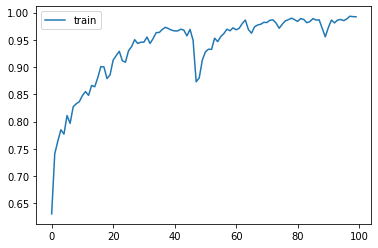

Epoch 1/100
81/81 [==============================] - 3s 33ms/step - loss: 1.2882 - acc: 0.6913
Epoch 2/100
81/81 [==============================] - 3s 36ms/step - loss: 0.5688 - acc: 0.7627
Epoch 3/100
81/81 [==============================] - 3s 36ms/step - loss: 0.4488 - acc: 0.8044
Epoch 4/100
81/81 [==============================] - 3s 36ms/step - loss: 0.3824 - acc: 0.8329
Epoch 5/100
81/81 [==============================] - 3s 36ms/step - loss: 0.3601 - acc: 0.8407
Epoch 6/100
81/81 [==============================] - 3s 36ms/step - loss: 0.3180 - acc: 0.8634
Epoch 7/100
81/81 [==============================] - 3s 36ms/step - loss: 0.2796 - acc: 0.8767
Epoch 8/100
81/81 [==============================] - 3s 34ms/step - loss: 0.2596 - acc: 0.8880
Epoch 9/100
81/81 [==============================] - 3s 36ms/step - loss: 0.2278 - acc: 0.8989
Epoch 10/100
81/81 [==============================] - 3s 36ms/step - loss: 0.2016 - acc: 0.9165
Epoch 11/100
81/81 [=============================

81/81 [==============================] - 3s 33ms/step - loss: 0.0333 - acc: 0.9902
Epoch 87/100
81/81 [==============================] - 3s 36ms/step - loss: 0.0310 - acc: 0.9902
Epoch 88/100
81/81 [==============================] - 3s 36ms/step - loss: 0.0255 - acc: 0.9895
Epoch 89/100
81/81 [==============================] - 3s 36ms/step - loss: 0.0179 - acc: 0.9949
Epoch 90/100
81/81 [==============================] - 3s 36ms/step - loss: 0.0176 - acc: 0.9930
Epoch 91/100
81/81 [==============================] - 3s 35ms/step - loss: 0.0113 - acc: 0.9961
Epoch 92/100
81/81 [==============================] - 3s 33ms/step - loss: 0.0111 - acc: 0.9973
Epoch 93/100
81/81 [==============================] - 3s 33ms/step - loss: 0.0086 - acc: 0.9977
Epoch 94/100
81/81 [==============================] - 3s 36ms/step - loss: 0.0079 - acc: 0.9973
Epoch 95/100
81/81 [==============================] - 3s 36ms/step - loss: 0.0074 - acc: 0.9969
Epoch 96/100
81/81 [==============================] -

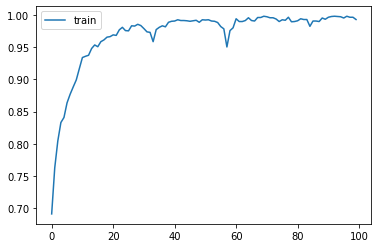

Epoch 1/100
77/77 [==============================] - 3s 35ms/step - loss: 1.6786 - acc: 0.6661
Epoch 2/100
77/77 [==============================] - 3s 36ms/step - loss: 0.9448 - acc: 0.6710
Epoch 3/100
77/77 [==============================] - 3s 36ms/step - loss: 0.6025 - acc: 0.7349
Epoch 4/100
77/77 [==============================] - 3s 36ms/step - loss: 0.5171 - acc: 0.7698
Epoch 5/100
77/77 [==============================] - 3s 36ms/step - loss: 0.4366 - acc: 0.8028
Epoch 6/100
77/77 [==============================] - 3s 35ms/step - loss: 0.3889 - acc: 0.8280
Epoch 7/100
77/77 [==============================] - 3s 33ms/step - loss: 0.3621 - acc: 0.8410
Epoch 8/100
77/77 [==============================] - 3s 33ms/step - loss: 0.3334 - acc: 0.8569
Epoch 9/100
77/77 [==============================] - 3s 36ms/step - loss: 0.3085 - acc: 0.8719
Epoch 10/100
77/77 [==============================] - 3s 36ms/step - loss: 0.2779 - acc: 0.8861
Epoch 11/100
77/77 [=============================

77/77 [==============================] - 3s 36ms/step - loss: 0.0202 - acc: 0.9931
Epoch 87/100
77/77 [==============================] - 3s 33ms/step - loss: 0.0131 - acc: 0.9951
Epoch 88/100
77/77 [==============================] - 3s 33ms/step - loss: 0.0125 - acc: 0.9967
Epoch 89/100
77/77 [==============================] - 3s 34ms/step - loss: 0.0094 - acc: 0.9976
Epoch 90/100
77/77 [==============================] - 3s 36ms/step - loss: 0.0077 - acc: 0.9976
Epoch 91/100
77/77 [==============================] - 3s 36ms/step - loss: 0.0058 - acc: 0.9980
Epoch 92/100
77/77 [==============================] - 3s 36ms/step - loss: 0.0052 - acc: 0.9984
Epoch 93/100
77/77 [==============================] - 3s 37ms/step - loss: 0.0102 - acc: 0.9967
Epoch 94/100
77/77 [==============================] - 3s 35ms/step - loss: 0.0092 - acc: 0.9963
Epoch 95/100
77/77 [==============================] - 3s 33ms/step - loss: 0.0111 - acc: 0.9959
Epoch 96/100
77/77 [==============================] -

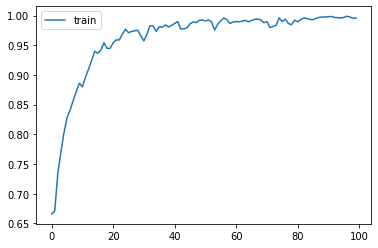

Epoch 1/100
77/77 [==============================] - 3s 33ms/step - loss: 1.0378 - acc: 0.7828
Epoch 2/100
77/77 [==============================] - 3s 33ms/step - loss: 0.4679 - acc: 0.8316
Epoch 3/100
77/77 [==============================] - 3s 35ms/step - loss: 0.3443 - acc: 0.8715
Epoch 4/100
77/77 [==============================] - 3s 36ms/step - loss: 0.2799 - acc: 0.8987
Epoch 5/100
77/77 [==============================] - 3s 36ms/step - loss: 0.2298 - acc: 0.9138
Epoch 6/100
77/77 [==============================] - 3s 36ms/step - loss: 0.1995 - acc: 0.9231
Epoch 7/100
77/77 [==============================] - 3s 36ms/step - loss: 0.1693 - acc: 0.9382
Epoch 8/100
77/77 [==============================] - 3s 35ms/step - loss: 0.1498 - acc: 0.9459
Epoch 9/100
77/77 [==============================] - 3s 33ms/step - loss: 0.1386 - acc: 0.9492
Epoch 10/100
77/77 [==============================] - 3s 34ms/step - loss: 0.1297 - acc: 0.9496
Epoch 11/100
77/77 [=============================

77/77 [==============================] - 4s 54ms/step - loss: 0.0093 - acc: 0.9976
Epoch 87/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0124 - acc: 0.9959
Epoch 88/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0115 - acc: 0.9963
Epoch 89/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0106 - acc: 0.9972
Epoch 90/100
77/77 [==============================] - 5s 70ms/step - loss: 0.0119 - acc: 0.9959
Epoch 91/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0207 - acc: 0.9943
Epoch 92/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0200 - acc: 0.9955
Epoch 93/100
77/77 [==============================] - 5s 66ms/step - loss: 0.0143 - acc: 0.9951
Epoch 94/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0141 - acc: 0.9963
Epoch 95/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0111 - acc: 0.9972
Epoch 96/100
77/77 [==============================] -

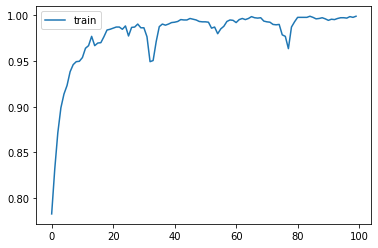

Epoch 1/100
87/87 [==============================] - 4s 48ms/step - loss: 0.9547 - acc: 0.8255
Epoch 2/100
87/87 [==============================] - 4s 48ms/step - loss: 0.4184 - acc: 0.8818
Epoch 3/100
87/87 [==============================] - 6s 64ms/step - loss: 0.2830 - acc: 0.9203
Epoch 4/100
87/87 [==============================] - 4s 48ms/step - loss: 0.2229 - acc: 0.9373
Epoch 5/100
87/87 [==============================] - 4s 51ms/step - loss: 0.2098 - acc: 0.9441
Epoch 6/100
87/87 [==============================] - 5s 58ms/step - loss: 0.1875 - acc: 0.9470
Epoch 7/100
87/87 [==============================] - 4s 48ms/step - loss: 0.1684 - acc: 0.9510
Epoch 8/100
87/87 [==============================] - 6s 64ms/step - loss: 0.1709 - acc: 0.9499
Epoch 9/100
87/87 [==============================] - 4s 48ms/step - loss: 0.1698 - acc: 0.9492
Epoch 10/100
87/87 [==============================] - 4s 48ms/step - loss: 0.1563 - acc: 0.9521
Epoch 11/100
87/87 [=============================

87/87 [==============================] - 4s 48ms/step - loss: 0.0023 - acc: 0.9993
Epoch 87/100
87/87 [==============================] - 4s 47ms/step - loss: 0.0018 - acc: 0.9996: 0s - loss: 0.0018 - acc: 0.999
Epoch 88/100
87/87 [==============================] - 6s 64ms/step - loss: 0.0047 - acc: 0.9982
Epoch 89/100
87/87 [==============================] - 4s 48ms/step - loss: 0.0032 - acc: 0.9993
Epoch 90/100
87/87 [==============================] - 4s 48ms/step - loss: 0.0035 - acc: 0.9993
Epoch 91/100
87/87 [==============================] - 6s 66ms/step - loss: 0.0032 - acc: 0.9993
Epoch 92/100
87/87 [==============================] - 4s 47ms/step - loss: 0.0029 - acc: 0.9989
Epoch 93/100
87/87 [==============================] - 4s 47ms/step - loss: 0.0021 - acc: 0.9993
Epoch 94/100
87/87 [==============================] - 6s 63ms/step - loss: 0.0024 - acc: 0.9993
Epoch 95/100
87/87 [==============================] - 4s 48ms/step - loss: 0.0012 - acc: 1.0000
Epoch 96/100
87/87 [=

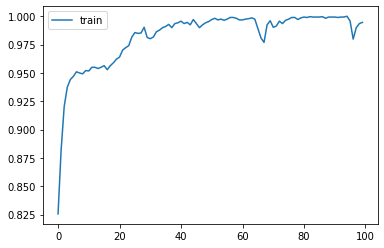

Epoch 1/100
81/81 [==============================] - 4s 49ms/step - loss: 0.9899 - acc: 0.7850
Epoch 2/100
81/81 [==============================] - 4s 48ms/step - loss: 0.5251 - acc: 0.8275
Epoch 3/100
81/81 [==============================] - 5s 64ms/step - loss: 0.4331 - acc: 0.8428
Epoch 4/100
81/81 [==============================] - 4s 47ms/step - loss: 0.4090 - acc: 0.8346
Epoch 5/100
81/81 [==============================] - 4s 48ms/step - loss: 0.3583 - acc: 0.8584
Epoch 6/100
81/81 [==============================] - 5s 59ms/step - loss: 0.3279 - acc: 0.8712
Epoch 7/100
81/81 [==============================] - 4s 52ms/step - loss: 0.2741 - acc: 0.8993
Epoch 8/100
81/81 [==============================] - 4s 48ms/step - loss: 0.2465 - acc: 0.9087
Epoch 9/100
81/81 [==============================] - 4s 47ms/step - loss: 0.2314 - acc: 0.9157
Epoch 10/100
81/81 [==============================] - 5s 62ms/step - loss: 0.2015 - acc: 0.9259
Epoch 11/100
81/81 [=============================

81/81 [==============================] - 4s 50ms/step - loss: 0.0059 - acc: 0.9984
Epoch 86/100
81/81 [==============================] - 5s 65ms/step - loss: 0.0041 - acc: 0.9988
Epoch 87/100
81/81 [==============================] - 4s 47ms/step - loss: 0.0032 - acc: 0.9988
Epoch 88/100
81/81 [==============================] - 4s 47ms/step - loss: 0.0060 - acc: 0.9988
Epoch 89/100
81/81 [==============================] - 5s 65ms/step - loss: 0.0089 - acc: 0.9977
Epoch 90/100
81/81 [==============================] - 4s 47ms/step - loss: 0.0113 - acc: 0.9961
Epoch 91/100
81/81 [==============================] - 4s 47ms/step - loss: 0.1257 - acc: 0.9770
Epoch 92/100
81/81 [==============================] - 4s 54ms/step - loss: 0.1321 - acc: 0.9625
Epoch 93/100
81/81 [==============================] - 5s 57ms/step - loss: 0.0351 - acc: 0.9871
Epoch 94/100
81/81 [==============================] - 4s 47ms/step - loss: 0.0689 - acc: 0.9797
Epoch 95/100
81/81 [==============================] -

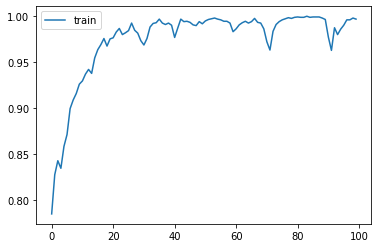

Epoch 1/100
77/77 [==============================] - 4s 48ms/step - loss: 1.1880 - acc: 0.7458
Epoch 2/100
77/77 [==============================] - 5s 65ms/step - loss: 0.5420 - acc: 0.7959
Epoch 3/100
77/77 [==============================] - 4s 47ms/step - loss: 0.4522 - acc: 0.8243
Epoch 4/100
77/77 [==============================] - 4s 47ms/step - loss: 0.3942 - acc: 0.8414
Epoch 5/100
77/77 [==============================] - 4s 47ms/step - loss: 0.3709 - acc: 0.8495
Epoch 6/100
77/77 [==============================] - 5s 65ms/step - loss: 0.3232 - acc: 0.8686
Epoch 7/100
77/77 [==============================] - 4s 47ms/step - loss: 0.2864 - acc: 0.8869
Epoch 8/100
77/77 [==============================] - 4s 48ms/step - loss: 0.2534 - acc: 0.8983
Epoch 9/100
77/77 [==============================] - 5s 66ms/step - loss: 0.2261 - acc: 0.9109
Epoch 10/100
77/77 [==============================] - 4s 48ms/step - loss: 0.2193 - acc: 0.9105
Epoch 11/100
77/77 [=============================

77/77 [==============================] - 4s 57ms/step - loss: 0.0085 - acc: 0.9976: 1s - loss: 0 - ETA: 0s - loss: 0.0087 - acc: 0.
Epoch 85/100
77/77 [==============================] - 5s 59ms/step - loss: 0.0081 - acc: 0.9980
Epoch 86/100
77/77 [==============================] - 6s 73ms/step - loss: 0.0089 - acc: 0.9963
Epoch 87/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0108 - acc: 0.9963
Epoch 88/100
77/77 [==============================] - 6s 76ms/step - loss: 0.0101 - acc: 0.9976
Epoch 89/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0122 - acc: 0.9951
Epoch 90/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0202 - acc: 0.9955
Epoch 91/100
77/77 [==============================] - 6s 75ms/step - loss: 0.0872 - acc: 0.9760
Epoch 92/100
77/77 [==============================] - 4s 56ms/step - loss: 0.2117 - acc: 0.9362
Epoch 93/100
77/77 [==============================] - 4s 56ms/step - loss: 0.1628 - acc: 0.9374
Epoc

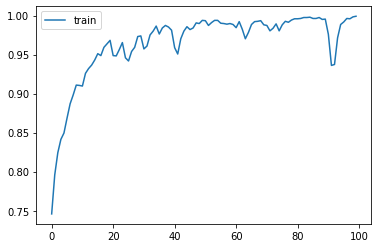

Epoch 1/100
87/87 [==============================] - 5s 57ms/step - loss: 0.9197 - acc: 0.7599: 2 - ETA: 1s - los
Epoch 2/100
87/87 [==============================] - 6s 74ms/step - loss: 0.4701 - acc: 0.8242
Epoch 3/100
87/87 [==============================] - 5s 56ms/step - loss: 0.4003 - acc: 0.8409
Epoch 4/100
87/87 [==============================] - 5s 57ms/step - loss: 0.3502 - acc: 0.8616
Epoch 5/100
87/87 [==============================] - 6s 73ms/step - loss: 0.3169 - acc: 0.8667
Epoch 6/100
87/87 [==============================] - 5s 56ms/step - loss: 0.2903 - acc: 0.8830
Epoch 7/100
87/87 [==============================] - 6s 72ms/step - loss: 0.2594 - acc: 0.8947
Epoch 8/100
87/87 [==============================] - 5s 57ms/step - loss: 0.2351 - acc: 0.9030
Epoch 9/100
87/87 [==============================] - 5s 58ms/step - loss: 0.2032 - acc: 0.9183
Epoch 10/100
87/87 [==============================] - 6s 73ms/step - loss: 0.1999 - acc: 0.9205
Epoch 11/100
87/87 [==========

87/87 [==============================] - 5s 57ms/step - loss: 0.0169 - acc: 0.9949
Epoch 85/100
87/87 [==============================] - 4s 50ms/step - loss: 0.0089 - acc: 0.9975
Epoch 86/100
87/87 [==============================] - 6s 65ms/step - loss: 0.0063 - acc: 0.9989
Epoch 87/100
87/87 [==============================] - 4s 50ms/step - loss: 0.0082 - acc: 0.9967
Epoch 88/100
87/87 [==============================] - 5s 52ms/step - loss: 0.0072 - acc: 0.9982
Epoch 89/100
87/87 [==============================] - 6s 69ms/step - loss: 0.0072 - acc: 0.9982
Epoch 90/100
87/87 [==============================] - 4s 51ms/step - loss: 0.0058 - acc: 0.9978
Epoch 91/100
87/87 [==============================] - 5s 60ms/step - loss: 0.0099 - acc: 0.9975
Epoch 92/100
87/87 [==============================] - 5s 60ms/step - loss: 0.0108 - acc: 0.9964
Epoch 93/100
87/87 [==============================] - 4s 51ms/step - loss: 0.0187 - acc: 0.9942
Epoch 94/100
87/87 [==============================] -

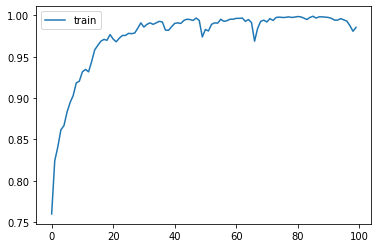

Epoch 1/100
88/88 [==============================] - 5s 53ms/step - loss: 1.1047 - acc: 0.6673: 1s - loss: 1.2712 - - ETA: 0s - loss: 1.1566
Epoch 2/100
88/88 [==============================] - 6s 72ms/step - loss: 0.6497 - acc: 0.6977
Epoch 3/100
88/88 [==============================] - 4s 48ms/step - loss: 0.5995 - acc: 0.7364
Epoch 4/100
88/88 [==============================] - 5s 59ms/step - loss: 0.5495 - acc: 0.7446
Epoch 5/100
88/88 [==============================] - 5s 56ms/step - loss: 0.5192 - acc: 0.7650
Epoch 6/100
88/88 [==============================] - 4s 47ms/step - loss: 0.4856 - acc: 0.7751
Epoch 7/100
88/88 [==============================] - 6s 65ms/step - loss: 0.4599 - acc: 0.7980
Epoch 8/100
88/88 [==============================] - 4s 47ms/step - loss: 0.4273 - acc: 0.8037
Epoch 9/100
88/88 [==============================] - 4s 49ms/step - loss: 0.4096 - acc: 0.8231
Epoch 10/100
88/88 [==============================] - 6s 64ms/step - loss: 0.3598 - acc: 0.8417
Epo

88/88 [==============================] - 4s 48ms/step - loss: 0.0629 - acc: 0.9764
Epoch 86/100
88/88 [==============================] - 4s 47ms/step - loss: 0.0432 - acc: 0.9842
Epoch 87/100
88/88 [==============================] - 6s 63ms/step - loss: 0.0328 - acc: 0.9878
Epoch 88/100
88/88 [==============================] - 4s 47ms/step - loss: 0.0355 - acc: 0.9900
Epoch 89/100
88/88 [==============================] - 4s 47ms/step - loss: 0.0343 - acc: 0.9878
Epoch 90/100
88/88 [==============================] - 6s 64ms/step - loss: 0.0424 - acc: 0.9864
Epoch 91/100
88/88 [==============================] - 4s 48ms/step - loss: 0.0412 - acc: 0.9857
Epoch 92/100
88/88 [==============================] - 4s 47ms/step - loss: 0.0385 - acc: 0.9857
Epoch 93/100
88/88 [==============================] - 6s 63ms/step - loss: 0.0403 - acc: 0.9846
Epoch 94/100
88/88 [==============================] - 4s 49ms/step - loss: 0.0301 - acc: 0.9871
Epoch 95/100
88/88 [==============================] -

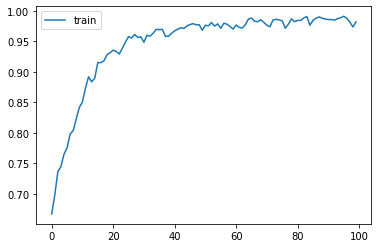

Epoch 1/100
80/80 [==============================] - 4s 48ms/step - loss: 1.4881 - acc: 0.6964
Epoch 2/100
80/80 [==============================] - 4s 48ms/step - loss: 0.6436 - acc: 0.7900
Epoch 3/100
80/80 [==============================] - 5s 63ms/step - loss: 0.5385 - acc: 0.8124
Epoch 4/100
80/80 [==============================] - 4s 47ms/step - loss: 0.4773 - acc: 0.8289
Epoch 5/100
80/80 [==============================] - 4s 48ms/step - loss: 0.4315 - acc: 0.8451
Epoch 6/100
80/80 [==============================] - 5s 63ms/step - loss: 0.3866 - acc: 0.8588
Epoch 7/100
80/80 [==============================] - 4s 48ms/step - loss: 0.3664 - acc: 0.8647
Epoch 8/100
80/80 [==============================] - 4s 50ms/step - loss: 0.3304 - acc: 0.8738
Epoch 9/100
80/80 [==============================] - 5s 67ms/step - loss: 0.3025 - acc: 0.8820
Epoch 10/100
80/80 [==============================] - 4s 48ms/step - loss: 0.2787 - acc: 0.8875
Epoch 11/100
80/80 [=============================

80/80 [==============================] - 5s 66ms/step - loss: 0.0394 - acc: 0.9878
Epoch 86/100
80/80 [==============================] - 4s 49ms/step - loss: 0.0334 - acc: 0.9886
Epoch 87/100
80/80 [==============================] - 4s 48ms/step - loss: 0.0523 - acc: 0.9855
Epoch 88/100
80/80 [==============================] - 5s 66ms/step - loss: 0.0192 - acc: 0.9945
Epoch 89/100
80/80 [==============================] - 4s 49ms/step - loss: 0.0225 - acc: 0.9937
Epoch 90/100
80/80 [==============================] - 4s 48ms/step - loss: 0.0149 - acc: 0.9953
Epoch 91/100
80/80 [==============================] - 5s 60ms/step - loss: 0.0118 - acc: 0.9965
Epoch 92/100
80/80 [==============================] - 4s 56ms/step - loss: 0.0092 - acc: 0.9972
Epoch 93/100
80/80 [==============================] - 4s 48ms/step - loss: 0.0084 - acc: 0.9969: 0s - loss: 0.0084 - acc: 0.996
Epoch 94/100
80/80 [==============================] - 5s 64ms/step - loss: 0.0113 - acc: 0.9965
Epoch 95/100
80/80 [=

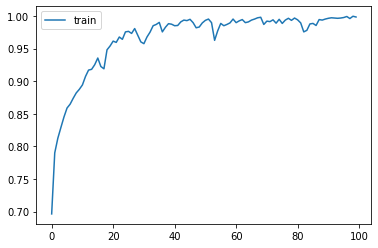

Epoch 1/100
101/101 [==============================] - 5s 48ms/step - loss: 1.6246 - acc: 0.5797
Epoch 2/100
101/101 [==============================] - 6s 62ms/step - loss: 0.8340 - acc: 0.6506
Epoch 3/100
101/101 [==============================] - 5s 48ms/step - loss: 0.7496 - acc: 0.6658
Epoch 4/100
101/101 [==============================] - 5s 48ms/step - loss: 0.6790 - acc: 0.6873
Epoch 5/100
101/101 [==============================] - 7s 66ms/step - loss: 0.6261 - acc: 0.7215
Epoch 6/100
101/101 [==============================] - 5s 51ms/step - loss: 0.5969 - acc: 0.7362
Epoch 7/100
101/101 [==============================] - 6s 63ms/step - loss: 0.5710 - acc: 0.7517
Epoch 8/100
101/101 [==============================] - 5s 48ms/step - loss: 0.5740 - acc: 0.7520
Epoch 9/100
101/101 [==============================] - 5s 49ms/step - loss: 0.5351 - acc: 0.7713
Epoch 10/100
101/101 [==============================] - 6s 62ms/step - loss: 0.5127 - acc: 0.7797
Epoch 11/100
101/101 [=======

101/101 [==============================] - 5s 48ms/step - loss: 0.0211 - acc: 0.9938
Epoch 85/100
101/101 [==============================] - 6s 61ms/step - loss: 0.0234 - acc: 0.9919
Epoch 86/100
101/101 [==============================] - 5s 48ms/step - loss: 0.0199 - acc: 0.9932
Epoch 87/100
101/101 [==============================] - 5s 48ms/step - loss: 0.0297 - acc: 0.9904
Epoch 88/100
101/101 [==============================] - 6s 63ms/step - loss: 0.0295 - acc: 0.9900
Epoch 89/100
101/101 [==============================] - 5s 49ms/step - loss: 0.0602 - acc: 0.9795
Epoch 90/100
101/101 [==============================] - 6s 64ms/step - loss: 0.0815 - acc: 0.9788
Epoch 91/100
101/101 [==============================] - 5s 49ms/step - loss: 0.0517 - acc: 0.9832
Epoch 92/100
101/101 [==============================] - 5s 50ms/step - loss: 0.0346 - acc: 0.9907
Epoch 93/100
101/101 [==============================] - 6s 63ms/step - loss: 0.0348 - acc: 0.9885
Epoch 94/100
101/101 [===========

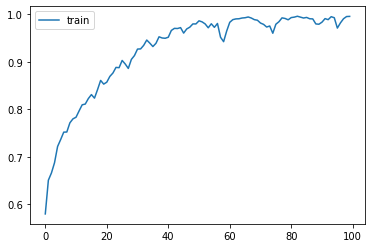

Epoch 1/100
78/78 [==============================] - 4s 49ms/step - loss: 1.3250 - acc: 0.7329
Epoch 2/100
78/78 [==============================] - 4s 49ms/step - loss: 0.5888 - acc: 0.7998
Epoch 3/100
78/78 [==============================] - 5s 61ms/step - loss: 0.4490 - acc: 0.8237
Epoch 4/100
78/78 [==============================] - 4s 57ms/step - loss: 0.4036 - acc: 0.8342
Epoch 5/100
78/78 [==============================] - 4s 49ms/step - loss: 0.3804 - acc: 0.8407
Epoch 6/100
78/78 [==============================] - 4s 48ms/step - loss: 0.3505 - acc: 0.8484
Epoch 7/100
78/78 [==============================] - 5s 66ms/step - loss: 0.3224 - acc: 0.8593
Epoch 8/100
78/78 [==============================] - 4s 49ms/step - loss: 0.3145 - acc: 0.8597
Epoch 9/100
78/78 [==============================] - 4s 48ms/step - loss: 0.3006 - acc: 0.8589
Epoch 10/100
78/78 [==============================] - 5s 66ms/step - loss: 0.2889 - acc: 0.8788
Epoch 11/100
78/78 [=============================

78/78 [==============================] - 5s 63ms/step - loss: 0.0195 - acc: 0.9935
Epoch 86/100
78/78 [==============================] - 4s 49ms/step - loss: 0.0137 - acc: 0.9964
Epoch 87/100
78/78 [==============================] - 4s 56ms/step - loss: 0.0171 - acc: 0.9947
Epoch 88/100
78/78 [==============================] - 5s 60ms/step - loss: 0.0218 - acc: 0.9923
Epoch 89/100
78/78 [==============================] - 4s 51ms/step - loss: 0.0578 - acc: 0.9805
Epoch 90/100
78/78 [==============================] - 5s 65ms/step - loss: 0.0678 - acc: 0.9785
Epoch 91/100
78/78 [==============================] - 4s 48ms/step - loss: 0.0684 - acc: 0.9814
Epoch 92/100
78/78 [==============================] - 4s 48ms/step - loss: 0.0282 - acc: 0.9911
Epoch 93/100
78/78 [==============================] - 5s 65ms/step - loss: 0.0173 - acc: 0.9943
Epoch 94/100
78/78 [==============================] - 4s 49ms/step - loss: 0.0277 - acc: 0.9903
Epoch 95/100
78/78 [==============================] -

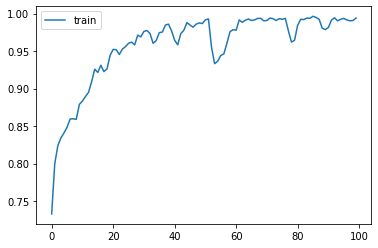

Epoch 1/100
79/79 [==============================] - 4s 49ms/step - loss: 1.3977 - acc: 0.7350
Epoch 2/100
79/79 [==============================] - 5s 64ms/step - loss: 0.5030 - acc: 0.8437
Epoch 3/100
79/79 [==============================] - 4s 49ms/step - loss: 0.3734 - acc: 0.8731
Epoch 4/100
79/79 [==============================] - 5s 59ms/step - loss: 0.3131 - acc: 0.8881
Epoch 5/100
79/79 [==============================] - 4s 53ms/step - loss: 0.2418 - acc: 0.9159
Epoch 6/100
79/79 [==============================] - 4s 48ms/step - loss: 0.2131 - acc: 0.9282
Epoch 7/100
79/79 [==============================] - 5s 65ms/step - loss: 0.1936 - acc: 0.9377
Epoch 8/100
79/79 [==============================] - 4s 48ms/step - loss: 0.1558 - acc: 0.9472
Epoch 9/100
79/79 [==============================] - 4s 49ms/step - loss: 0.1358 - acc: 0.9536
Epoch 10/100
79/79 [==============================] - 5s 64ms/step - loss: 0.1214 - acc: 0.9572
Epoch 11/100
79/79 [=============================

79/79 [==============================] - 4s 49ms/step - loss: 0.0050 - acc: 0.9980
Epoch 87/100
79/79 [==============================] - 4s 52ms/step - loss: 0.0194 - acc: 0.9933
Epoch 88/100
79/79 [==============================] - 5s 61ms/step - loss: 0.0358 - acc: 0.9921
Epoch 89/100
79/79 [==============================] - 4s 49ms/step - loss: 0.0301 - acc: 0.9921
Epoch 90/100
79/79 [==============================] - 4s 49ms/step - loss: 0.0150 - acc: 0.9952
Epoch 91/100
79/79 [==============================] - 5s 66ms/step - loss: 0.0091 - acc: 0.9956
Epoch 92/100
79/79 [==============================] - 4s 48ms/step - loss: 0.0147 - acc: 0.9956
Epoch 93/100
79/79 [==============================] - 4s 48ms/step - loss: 0.0085 - acc: 0.9968
Epoch 94/100
79/79 [==============================] - 5s 66ms/step - loss: 0.0123 - acc: 0.9968
Epoch 95/100
79/79 [==============================] - 4s 49ms/step - loss: 0.0094 - acc: 0.9968
Epoch 96/100
79/79 [==============================] -

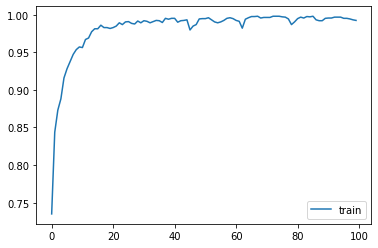

Epoch 1/100
86/86 [==============================] - 4s 49ms/step - loss: 1.3094 - acc: 0.6956
Epoch 2/100
86/86 [==============================] - 4s 49ms/step - loss: 0.5610 - acc: 0.7855
Epoch 3/100
86/86 [==============================] - 5s 64ms/step - loss: 0.4460 - acc: 0.8225
Epoch 4/100
86/86 [==============================] - 4s 49ms/step - loss: 0.3903 - acc: 0.8465
Epoch 5/100
86/86 [==============================] - 5s 54ms/step - loss: 0.3404 - acc: 0.8687
Epoch 6/100
86/86 [==============================] - 5s 56ms/step - loss: 0.3268 - acc: 0.8745
Epoch 7/100
86/86 [==============================] - 4s 48ms/step - loss: 0.2867 - acc: 0.8905
Epoch 8/100
86/86 [==============================] - 5s 64ms/step - loss: 0.2777 - acc: 0.8960
Epoch 9/100
86/86 [==============================] - 4s 49ms/step - loss: 0.2458 - acc: 0.9065
Epoch 10/100
86/86 [==============================] - 4s 50ms/step - loss: 0.2516 - acc: 0.9069
Epoch 11/100
86/86 [=============================

86/86 [==============================] - 4s 48ms/step - loss: 0.0256 - acc: 0.9927
Epoch 87/100
86/86 [==============================] - 5s 62ms/step - loss: 0.0606 - acc: 0.9851
Epoch 88/100
86/86 [==============================] - 4s 52ms/step - loss: 0.0621 - acc: 0.9829
Epoch 89/100
86/86 [==============================] - 4s 51ms/step - loss: 0.0698 - acc: 0.9785
Epoch 90/100
86/86 [==============================] - 6s 67ms/step - loss: 0.0979 - acc: 0.9709
Epoch 91/100
86/86 [==============================] - 4s 49ms/step - loss: 0.0702 - acc: 0.9815
Epoch 92/100
86/86 [==============================] - 4s 49ms/step - loss: 0.0355 - acc: 0.9905
Epoch 93/100
86/86 [==============================] - 6s 64ms/step - loss: 0.0214 - acc: 0.9927
Epoch 94/100
86/86 [==============================] - 4s 48ms/step - loss: 0.0131 - acc: 0.9960
Epoch 95/100
86/86 [==============================] - 4s 48ms/step - loss: 0.0179 - acc: 0.9956
Epoch 96/100
86/86 [==============================] -

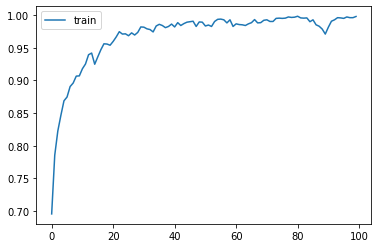

Epoch 1/100
86/86 [==============================] - 5s 64ms/step - loss: 1.1779 - acc: 0.7967
Epoch 2/100
86/86 [==============================] - 4s 48ms/step - loss: 0.5717 - acc: 0.8484
Epoch 3/100
86/86 [==============================] - 4s 50ms/step - loss: 0.4579 - acc: 0.8623
Epoch 4/100
86/86 [==============================] - 6s 64ms/step - loss: 0.4123 - acc: 0.8630
Epoch 5/100
86/86 [==============================] - 4s 49ms/step - loss: 0.3730 - acc: 0.8740
Epoch 6/100
86/86 [==============================] - 5s 60ms/step - loss: 0.3443 - acc: 0.8795
Epoch 7/100
86/86 [==============================] - 4s 52ms/step - loss: 0.3174 - acc: 0.8949
Epoch 8/100
86/86 [==============================] - 4s 49ms/step - loss: 0.2865 - acc: 0.8949
Epoch 9/100
86/86 [==============================] - 6s 65ms/step - loss: 0.2651 - acc: 0.9037
Epoch 10/100
86/86 [==============================] - 4s 49ms/step - loss: 0.2437 - acc: 0.9077
Epoch 11/100
86/86 [=============================

86/86 [==============================] - 4s 48ms/step - loss: 0.0269 - acc: 0.9919
Epoch 87/100
86/86 [==============================] - 4s 52ms/step - loss: 0.0152 - acc: 0.9952
Epoch 88/100
86/86 [==============================] - 5s 61ms/step - loss: 0.0142 - acc: 0.9952
Epoch 89/100
86/86 [==============================] - 4s 49ms/step - loss: 0.0166 - acc: 0.9956
Epoch 90/100
86/86 [==============================] - 5s 55ms/step - loss: 0.0168 - acc: 0.9941
Epoch 91/100
86/86 [==============================] - 5s 58ms/step - loss: 0.0141 - acc: 0.9956
Epoch 92/100
86/86 [==============================] - 4s 48ms/step - loss: 0.0137 - acc: 0.9960
Epoch 93/100
86/86 [==============================] - 5s 54ms/step - loss: 0.0059 - acc: 0.9989
Epoch 94/100
86/86 [==============================] - 5s 59ms/step - loss: 0.0049 - acc: 0.9982
Epoch 95/100
86/86 [==============================] - 4s 48ms/step - loss: 0.0056 - acc: 0.9971
Epoch 96/100
86/86 [==============================] -

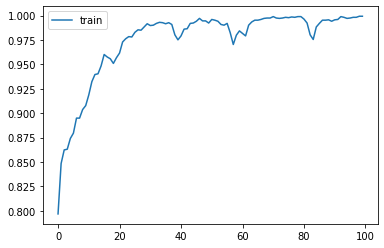

Epoch 1/100
77/77 [==============================] - 4s 49ms/step - loss: 0.8135 - acc: 0.8198
Epoch 2/100
77/77 [==============================] - 4s 53ms/step - loss: 0.3518 - acc: 0.8865
Epoch 3/100
77/77 [==============================] - 5s 62ms/step - loss: 0.2755 - acc: 0.9020
Epoch 4/100
77/77 [==============================] - 4s 49ms/step - loss: 0.2248 - acc: 0.9219
Epoch 5/100
77/77 [==============================] - 4s 48ms/step - loss: 0.1926 - acc: 0.9288
Epoch 6/100
77/77 [==============================] - 5s 67ms/step - loss: 0.1838 - acc: 0.9353
Epoch 7/100
77/77 [==============================] - 4s 48ms/step - loss: 0.1587 - acc: 0.9435
Epoch 8/100
77/77 [==============================] - 4s 48ms/step - loss: 0.1452 - acc: 0.9451
Epoch 9/100
77/77 [==============================] - 5s 67ms/step - loss: 0.1252 - acc: 0.9467
Epoch 10/100
77/77 [==============================] - 4s 48ms/step - loss: 0.1086 - acc: 0.9626
Epoch 11/100
77/77 [=============================

77/77 [==============================] - 5s 64ms/step - loss: 0.0154 - acc: 0.9947
Epoch 87/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0180 - acc: 0.9939
Epoch 88/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0159 - acc: 0.9943
Epoch 89/100
77/77 [==============================] - 5s 66ms/step - loss: 0.0177 - acc: 0.9935
Epoch 90/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0114 - acc: 0.9963
Epoch 91/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0105 - acc: 0.9967
Epoch 92/100
77/77 [==============================] - 5s 66ms/step - loss: 0.0143 - acc: 0.9951
Epoch 93/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0176 - acc: 0.9947
Epoch 94/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0153 - acc: 0.9935
Epoch 95/100
77/77 [==============================] - 5s 61ms/step - loss: 0.0150 - acc: 0.9943
Epoch 96/100
77/77 [==============================] -

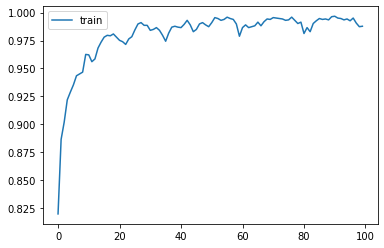

Epoch 1/100
99/99 [==============================] - 5s 49ms/step - loss: 1.3366 - acc: 0.7460
Epoch 2/100
99/99 [==============================] - 6s 62ms/step - loss: 0.5080 - acc: 0.8298
Epoch 3/100
99/99 [==============================] - 5s 49ms/step - loss: 0.4203 - acc: 0.8486
Epoch 4/100
99/99 [==============================] - 6s 63ms/step - loss: 0.3641 - acc: 0.8692
Epoch 5/100
99/99 [==============================] - 5s 49ms/step - loss: 0.3359 - acc: 0.8714
Epoch 6/100
99/99 [==============================] - 5s 48ms/step - loss: 0.2984 - acc: 0.8854
Epoch 7/100
99/99 [==============================] - 6s 61ms/step - loss: 0.2639 - acc: 0.9041
Epoch 8/100
99/99 [==============================] - 5s 49ms/step - loss: 0.2571 - acc: 0.9032
Epoch 9/100
99/99 [==============================] - 6s 62ms/step - loss: 0.2450 - acc: 0.9063
Epoch 10/100
99/99 [==============================] - 5s 49ms/step - loss: 0.2279 - acc: 0.9121
Epoch 11/100
99/99 [=============================

99/99 [==============================] - 5s 47ms/step - loss: 0.0980 - acc: 0.9698
Epoch 86/100
99/99 [==============================] - 6s 60ms/step - loss: 0.0597 - acc: 0.9813
Epoch 87/100
99/99 [==============================] - 5s 47ms/step - loss: 0.0432 - acc: 0.9870
Epoch 88/100
99/99 [==============================] - 6s 64ms/step - loss: 0.0450 - acc: 0.9870
Epoch 89/100
99/99 [==============================] - 5s 47ms/step - loss: 0.0242 - acc: 0.9937
Epoch 90/100
99/99 [==============================] - 5s 47ms/step - loss: 0.0205 - acc: 0.9949
Epoch 91/100
99/99 [==============================] - 6s 61ms/step - loss: 0.0200 - acc: 0.9943
Epoch 92/100
99/99 [==============================] - 5s 47ms/step - loss: 0.0201 - acc: 0.9943
Epoch 93/100
99/99 [==============================] - 6s 60ms/step - loss: 0.0253 - acc: 0.9902
Epoch 94/100
99/99 [==============================] - 5s 47ms/step - loss: 0.0170 - acc: 0.9937: 0s - loss: 0.0164 - acc: 0.9
Epoch 95/100
99/99 [===

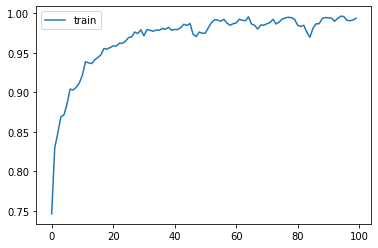

Epoch 1/100
91/91 [==============================] - 4s 47ms/step - loss: 1.3568 - acc: 0.7682
Epoch 2/100
91/91 [==============================] - 4s 49ms/step - loss: 0.6488 - acc: 0.8375
Epoch 3/100
91/91 [==============================] - 5s 60ms/step - loss: 0.4123 - acc: 0.8706
Epoch 4/100
91/91 [==============================] - 4s 47ms/step - loss: 0.3344 - acc: 0.8893
Epoch 5/100
91/91 [==============================] - 5s 56ms/step - loss: 0.2675 - acc: 0.9017
Epoch 6/100
91/91 [==============================] - 5s 54ms/step - loss: 0.2506 - acc: 0.9055
Epoch 7/100
91/91 [==============================] - 4s 47ms/step - loss: 0.2176 - acc: 0.9227
Epoch 8/100
91/91 [==============================] - 6s 63ms/step - loss: 0.1896 - acc: 0.9300
Epoch 9/100
91/91 [==============================] - 4s 49ms/step - loss: 0.1726 - acc: 0.9420: 0s - loss: 0.1726 - acc: 0.942
Epoch 10/100
91/91 [==============================] - 4s 47ms/step - loss: 0.1574 - acc: 0.9486
Epoch 11/100
91/9

Epoch 86/100
91/91 [==============================] - 6s 62ms/step - loss: 0.0233 - acc: 0.9928
Epoch 87/100
91/91 [==============================] - 4s 47ms/step - loss: 0.0368 - acc: 0.9876
Epoch 88/100
91/91 [==============================] - 5s 60ms/step - loss: 0.0335 - acc: 0.9903
Epoch 89/100
91/91 [==============================] - 5s 50ms/step - loss: 0.0145 - acc: 0.9948
Epoch 90/100
91/91 [==============================] - 4s 48ms/step - loss: 0.0115 - acc: 0.9972
Epoch 91/100
91/91 [==============================] - 6s 63ms/step - loss: 0.0096 - acc: 0.9979
Epoch 92/100
91/91 [==============================] - 4s 47ms/step - loss: 0.0144 - acc: 0.9972
Epoch 93/100
91/91 [==============================] - 4s 47ms/step - loss: 0.0076 - acc: 0.9976
Epoch 94/100
91/91 [==============================] - 6s 64ms/step - loss: 0.0087 - acc: 0.9966
Epoch 95/100
91/91 [==============================] - 4s 48ms/step - loss: 0.0147 - acc: 0.9959
Epoch 96/100
91/91 [====================

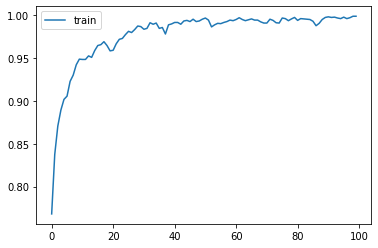

Epoch 1/100
105/105 [==============================] - 5s 47ms/step - loss: 1.4958 - acc: 0.6383
Epoch 2/100
105/105 [==============================] - 7s 62ms/step - loss: 0.7516 - acc: 0.6928
Epoch 3/100
105/105 [==============================] - 5s 47ms/step - loss: 0.6112 - acc: 0.7378
Epoch 4/100
105/105 [==============================] - 5s 47ms/step - loss: 0.5511 - acc: 0.7706
Epoch 5/100
105/105 [==============================] - 6s 62ms/step - loss: 0.4944 - acc: 0.8039
Epoch 6/100
105/105 [==============================] - 5s 47ms/step - loss: 0.4517 - acc: 0.8197
Epoch 7/100
105/105 [==============================] - 7s 65ms/step - loss: 0.3952 - acc: 0.8462
Epoch 8/100
105/105 [==============================] - 6s 56ms/step - loss: 0.3615 - acc: 0.8603
Epoch 9/100
105/105 [==============================] - 7s 67ms/step - loss: 0.3217 - acc: 0.8749
Epoch 10/100
105/105 [==============================] - 6s 59ms/step - loss: 0.3074 - acc: 0.8859
Epoch 11/100
105/105 [=======

105/105 [==============================] - 5s 48ms/step - loss: 0.0359 - acc: 0.9884
Epoch 85/100
105/105 [==============================] - 6s 60ms/step - loss: 0.0256 - acc: 0.9905
Epoch 86/100
105/105 [==============================] - 5s 48ms/step - loss: 0.0242 - acc: 0.9928
Epoch 87/100
105/105 [==============================] - 6s 61ms/step - loss: 0.0207 - acc: 0.9943
Epoch 88/100
105/105 [==============================] - 5s 48ms/step - loss: 0.0380 - acc: 0.9917
Epoch 89/100
105/105 [==============================] - 7s 62ms/step - loss: 0.0639 - acc: 0.9818
Epoch 90/100
105/105 [==============================] - 5s 48ms/step - loss: 0.0565 - acc: 0.9818
Epoch 91/100
105/105 [==============================] - 5s 48ms/step - loss: 0.0625 - acc: 0.9818
Epoch 92/100
105/105 [==============================] - 7s 63ms/step - loss: 0.0398 - acc: 0.9857
Epoch 93/100
105/105 [==============================] - 5s 48ms/step - loss: 0.0412 - acc: 0.9872
Epoch 94/100
105/105 [===========

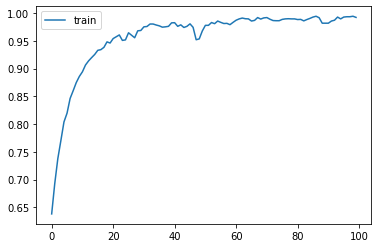

Epoch 1/100
83/83 [==============================] - 4s 47ms/step - loss: 1.0152 - acc: 0.8169
Epoch 2/100
83/83 [==============================] - 4s 47ms/step - loss: 0.5611 - acc: 0.8306: 0s - loss: 0.5282 - acc:
Epoch 3/100
83/83 [==============================] - 5s 64ms/step - loss: 0.4020 - acc: 0.8484
Epoch 4/100
83/83 [==============================] - 4s 47ms/step - loss: 0.3641 - acc: 0.8685
Epoch 5/100
83/83 [==============================] - 4s 48ms/step - loss: 0.3350 - acc: 0.8734
Epoch 6/100
83/83 [==============================] - 5s 63ms/step - loss: 0.3094 - acc: 0.8787
Epoch 7/100
83/83 [==============================] - 4s 48ms/step - loss: 0.2826 - acc: 0.8882
Epoch 8/100
83/83 [==============================] - 4s 52ms/step - loss: 0.2799 - acc: 0.8965
Epoch 9/100
83/83 [==============================] - 5s 58ms/step - loss: 0.2620 - acc: 0.9014
Epoch 10/100
83/83 [==============================] - 4s 48ms/step - loss: 0.2421 - acc: 0.9090
Epoch 11/100
83/83 [===

83/83 [==============================] - 5s 62ms/step - loss: 0.0148 - acc: 0.9955
Epoch 86/100
83/83 [==============================] - 4s 47ms/step - loss: 0.0125 - acc: 0.9973
Epoch 87/100
83/83 [==============================] - 4s 47ms/step - loss: 0.0164 - acc: 0.9939
Epoch 88/100
83/83 [==============================] - 5s 64ms/step - loss: 0.0216 - acc: 0.9924
Epoch 89/100
83/83 [==============================] - 4s 47ms/step - loss: 0.0366 - acc: 0.9875
Epoch 90/100
83/83 [==============================] - 5s 54ms/step - loss: 0.0339 - acc: 0.9882
Epoch 91/100
83/83 [==============================] - 5s 55ms/step - loss: 0.0529 - acc: 0.9852
Epoch 92/100
83/83 [==============================] - 4s 47ms/step - loss: 0.0619 - acc: 0.9765
Epoch 93/100
83/83 [==============================] - 5s 61ms/step - loss: 0.0894 - acc: 0.9750
Epoch 94/100
83/83 [==============================] - 4s 47ms/step - loss: 0.0436 - acc: 0.9845
Epoch 95/100
83/83 [==============================] -

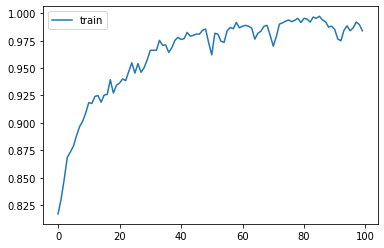

Epoch 1/100
83/83 [==============================] - 5s 63ms/step - loss: 1.4695 - acc: 0.6547
Epoch 2/100
83/83 [==============================] - 4s 47ms/step - loss: 0.7687 - acc: 0.7354
Epoch 3/100
83/83 [==============================] - 4s 47ms/step - loss: 0.6320 - acc: 0.7667
Epoch 4/100
83/83 [==============================] - 5s 63ms/step - loss: 0.5784 - acc: 0.7785
Epoch 5/100
83/83 [==============================] - 4s 48ms/step - loss: 0.5436 - acc: 0.7903
Epoch 6/100
83/83 [==============================] - 4s 50ms/step - loss: 0.5056 - acc: 0.8131
Epoch 7/100
83/83 [==============================] - 5s 60ms/step - loss: 0.4846 - acc: 0.8165
Epoch 8/100
83/83 [==============================] - 4s 48ms/step - loss: 0.4738 - acc: 0.8196
Epoch 9/100
83/83 [==============================] - 5s 54ms/step - loss: 0.4388 - acc: 0.8352
Epoch 10/100
83/83 [==============================] - 5s 57ms/step - loss: 0.4237 - acc: 0.8439
Epoch 11/100
83/83 [=============================

83/83 [==============================] - 5s 66ms/step - loss: 0.0583 - acc: 0.9817
Epoch 87/100
83/83 [==============================] - 4s 48ms/step - loss: 0.0325 - acc: 0.9909
Epoch 88/100
83/83 [==============================] - 4s 47ms/step - loss: 0.0304 - acc: 0.9893
Epoch 89/100
83/83 [==============================] - 5s 63ms/step - loss: 0.0217 - acc: 0.9916
Epoch 90/100
83/83 [==============================] - 4s 47ms/step - loss: 0.0170 - acc: 0.9951
Epoch 91/100
83/83 [==============================] - 4s 47ms/step - loss: 0.0260 - acc: 0.9920: 0s - loss: 0.0269 - 
Epoch 92/100
83/83 [==============================] - 5s 63ms/step - loss: 0.0397 - acc: 0.9867
Epoch 93/100
83/83 [==============================] - 4s 47ms/step - loss: 0.0537 - acc: 0.9829
Epoch 94/100
83/83 [==============================] - 4s 52ms/step - loss: 0.0453 - acc: 0.9848
Epoch 95/100
83/83 [==============================] - 5s 59ms/step - loss: 0.0338 - acc: 0.9871
Epoch 96/100
83/83 [===========

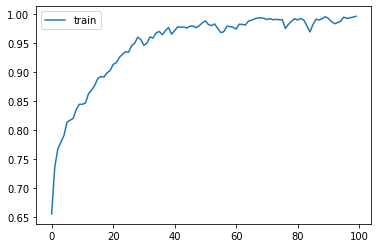

Epoch 1/100
71/71 [==============================] - 3s 47ms/step - loss: nan - acc: 0.0767
Epoch 2/100
71/71 [==============================] - 3s 48ms/step - loss: nan - acc: 0.0767
Epoch 3/100
71/71 [==============================] - 3s 47ms/step - loss: nan - acc: 0.0767
Epoch 4/100
71/71 [==============================] - 5s 66ms/step - loss: nan - acc: 0.0767
Epoch 5/100
71/71 [==============================] - 3s 48ms/step - loss: nan - acc: 0.0767
Epoch 6/100
71/71 [==============================] - 3s 48ms/step - loss: nan - acc: 0.0767
Epoch 7/100
71/71 [==============================] - 5s 65ms/step - loss: nan - acc: 0.0767
Epoch 8/100
71/71 [==============================] - 3s 47ms/step - loss: nan - acc: 0.0767
Epoch 9/100
71/71 [==============================] - 3s 48ms/step - loss: nan - acc: 0.0767
Epoch 10/100
71/71 [==============================] - 3s 49ms/step - loss: nan - acc: 0.0767
Epoch 11/100
71/71 [==============================] - 4s 60ms/step - loss: nan 

71/71 [==============================] - 2s 33ms/step - loss: nan - acc: 0.0767
Epoch 90/100
71/71 [==============================] - 2s 34ms/step - loss: nan - acc: 0.0767
Epoch 91/100
71/71 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0767
Epoch 92/100
71/71 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0767
Epoch 93/100
71/71 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0767
Epoch 94/100
71/71 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0767
Epoch 95/100
71/71 [==============================] - 2s 33ms/step - loss: nan - acc: 0.0767
Epoch 96/100
71/71 [==============================] - 2s 33ms/step - loss: nan - acc: 0.0767
Epoch 97/100
71/71 [==============================] - 2s 33ms/step - loss: nan - acc: 0.0767
Epoch 98/100
71/71 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0767
Epoch 99/100
71/71 [==============================] - 3s 36ms/step - loss: nan - ac

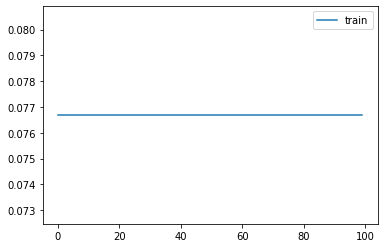

Epoch 1/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1647
Epoch 2/100
89/89 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1647
Epoch 3/100
89/89 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1647
Epoch 4/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1647
Epoch 5/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1647
Epoch 6/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1647
Epoch 7/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1647
Epoch 8/100
89/89 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1647
Epoch 9/100
89/89 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1647
Epoch 10/100
89/89 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1647
Epoch 11/100
89/89 [==============================] - 3s 36ms/step - loss: nan 

89/89 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1647
Epoch 90/100
89/89 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1647
Epoch 91/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1647
Epoch 92/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1647
Epoch 93/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1647
Epoch 94/100
89/89 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1647
Epoch 95/100
89/89 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1647
Epoch 96/100
89/89 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1647
Epoch 97/100
89/89 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1647
Epoch 98/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1647
Epoch 99/100
89/89 [==============================] - 3s 36ms/step - loss: nan - ac

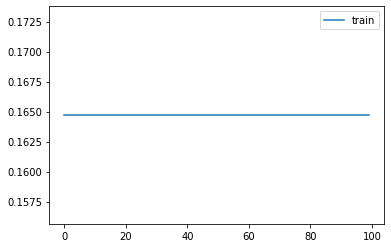

Epoch 1/100
94/94 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0706
Epoch 2/100
94/94 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0706
Epoch 3/100
94/94 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0706
Epoch 4/100
94/94 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0706
Epoch 5/100
94/94 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0706
Epoch 6/100
94/94 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0706
Epoch 7/100
94/94 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0706
Epoch 8/100
94/94 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0706
Epoch 9/100
94/94 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0706
Epoch 10/100
94/94 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0706
Epoch 11/100
94/94 [==============================] - 3s 35ms/step - loss: nan 

94/94 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0706
Epoch 90/100
94/94 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0706
Epoch 91/100
94/94 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0706
Epoch 92/100
94/94 [==============================] - 3s 34ms/step - loss: nan - acc: 0.0706
Epoch 93/100
94/94 [==============================] - 3s 34ms/step - loss: nan - acc: 0.0706
Epoch 94/100
94/94 [==============================] - 3s 34ms/step - loss: nan - acc: 0.0706
Epoch 95/100
94/94 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0706
Epoch 96/100
94/94 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0706
Epoch 97/100
94/94 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0706
Epoch 98/100
94/94 [==============================] - 3s 34ms/step - loss: nan - acc: 0.0706
Epoch 99/100
94/94 [==============================] - 3s 33ms/step - loss: nan - ac

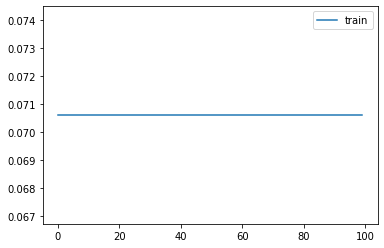

Epoch 1/100
76/76 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1363
Epoch 2/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1363
Epoch 3/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1363
Epoch 4/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1363
Epoch 5/100
76/76 [==============================] - 2s 33ms/step - loss: nan - acc: 0.1363
Epoch 6/100
76/76 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1363
Epoch 7/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1363
Epoch 8/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1363
Epoch 9/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1363
Epoch 10/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1363
Epoch 11/100
76/76 [==============================] - 3s 33ms/step - loss: nan 

76/76 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1363
Epoch 89/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1363
Epoch 90/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1363
Epoch 91/100
76/76 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1363
Epoch 92/100
76/76 [==============================] - 2s 33ms/step - loss: nan - acc: 0.1363
Epoch 93/100
76/76 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1363
Epoch 94/100
76/76 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1363
Epoch 95/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1363
Epoch 96/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1363
Epoch 97/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1363
Epoch 98/100
76/76 [==============================] - 3s 34ms/step - loss: nan - ac

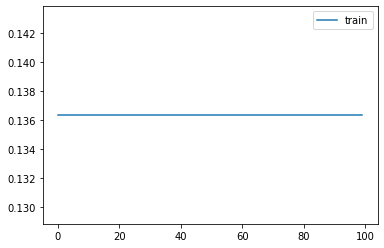

Epoch 1/100
76/76 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1633
Epoch 2/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1633
Epoch 3/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1633
Epoch 4/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1633
Epoch 5/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1633
Epoch 6/100
76/76 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1633
Epoch 7/100
76/76 [==============================] - 2s 32ms/step - loss: nan - acc: 0.1633
Epoch 8/100
76/76 [==============================] - 2s 32ms/step - loss: nan - acc: 0.1633
Epoch 9/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1633
Epoch 10/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1633
Epoch 11/100
76/76 [==============================] - 3s 35ms/step - loss: nan 

76/76 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1633
Epoch 90/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1633
Epoch 91/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1633
Epoch 92/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1633
Epoch 93/100
76/76 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1633
Epoch 94/100
76/76 [==============================] - 2s 33ms/step - loss: nan - acc: 0.1633
Epoch 95/100
76/76 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1633
Epoch 96/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1633
Epoch 97/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1633
Epoch 98/100
76/76 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1633
Epoch 99/100
76/76 [==============================] - 3s 36ms/step - loss: nan - ac

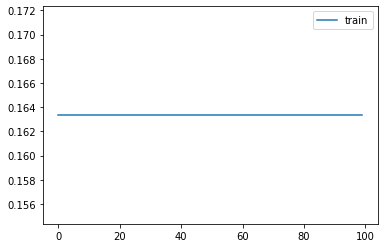

Epoch 1/100
82/82 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1115
Epoch 2/100
82/82 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1115
Epoch 3/100
82/82 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1115
Epoch 4/100
82/82 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1115
Epoch 5/100
82/82 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1115
Epoch 6/100
82/82 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1115
Epoch 7/100
82/82 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1115
Epoch 8/100
82/82 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1115
Epoch 9/100
82/82 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1115
Epoch 10/100
82/82 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1115
Epoch 11/100
82/82 [==============================] - 3s 35ms/step - loss: nan 

82/82 [==============================] - 3s 32ms/step - loss: nan - acc: 0.1115
Epoch 90/100
82/82 [==============================] - 3s 32ms/step - loss: nan - acc: 0.1115
Epoch 91/100
82/82 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1115
Epoch 92/100
82/82 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1115
Epoch 93/100
82/82 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1115
Epoch 94/100
82/82 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1115
Epoch 95/100
82/82 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1115
Epoch 96/100
82/82 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1115
Epoch 97/100
82/82 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1115
Epoch 98/100
82/82 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1115
Epoch 99/100
82/82 [==============================] - 3s 36ms/step - loss: nan - ac

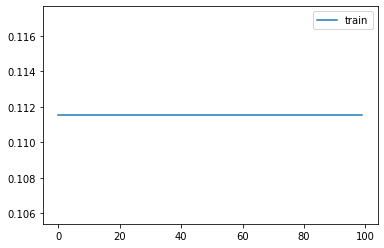

Epoch 1/100
77/77 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1826
Epoch 2/100
77/77 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1826
Epoch 3/100
77/77 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1826
Epoch 4/100
77/77 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1826
Epoch 5/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1826
Epoch 6/100
77/77 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1826
Epoch 7/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1826
Epoch 8/100
77/77 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1826
Epoch 9/100
77/77 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1826
Epoch 10/100
77/77 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1826
Epoch 11/100
77/77 [==============================] - 3s 35ms/step - loss: nan 

77/77 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1826
Epoch 90/100
77/77 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1826
Epoch 91/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1826
Epoch 92/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1826
Epoch 93/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1826
Epoch 94/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1826
Epoch 95/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1826
Epoch 96/100
77/77 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1826
Epoch 97/100
77/77 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1826
Epoch 98/100
77/77 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1826
Epoch 99/100
77/77 [==============================] - 3s 36ms/step - loss: nan - ac

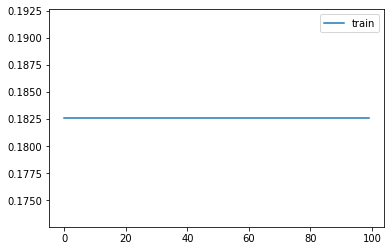

Epoch 1/100
90/90 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0893
Epoch 2/100
90/90 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0893
Epoch 3/100
90/90 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0893
Epoch 4/100
90/90 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0893
Epoch 5/100
90/90 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0893
Epoch 6/100
90/90 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0893
Epoch 7/100
90/90 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0893
Epoch 8/100
90/90 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0893
Epoch 9/100
90/90 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0893
Epoch 10/100
90/90 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0893
Epoch 11/100
90/90 [==============================] - 3s 36ms/step - loss: nan 

90/90 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0893
Epoch 90/100
90/90 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0893
Epoch 91/100
90/90 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0893
Epoch 92/100
90/90 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0893
Epoch 93/100
90/90 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0893
Epoch 94/100
90/90 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0893
Epoch 95/100
90/90 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0893
Epoch 96/100
90/90 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0893
Epoch 97/100
90/90 [==============================] - 3s 38ms/step - loss: nan - acc: 0.0893
Epoch 98/100
90/90 [==============================] - 3s 39ms/step - loss: nan - acc: 0.0893
Epoch 99/100
90/90 [==============================] - 3s 36ms/step - loss: nan - ac

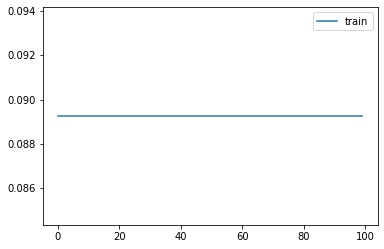

Epoch 1/100
55/55 [==============================] - 2s 35ms/step - loss: nan - acc: 0.1536
Epoch 2/100
55/55 [==============================] - 2s 33ms/step - loss: nan - acc: 0.1536
Epoch 3/100
55/55 [==============================] - 2s 35ms/step - loss: nan - acc: 0.1536
Epoch 4/100
55/55 [==============================] - 2s 35ms/step - loss: nan - acc: 0.1536
Epoch 5/100
55/55 [==============================] - 2s 38ms/step - loss: nan - acc: 0.1536
Epoch 6/100
55/55 [==============================] - 2s 36ms/step - loss: nan - acc: 0.1536
Epoch 7/100
55/55 [==============================] - 2s 37ms/step - loss: nan - acc: 0.1536
Epoch 8/100
55/55 [==============================] - 2s 38ms/step - loss: nan - acc: 0.1536
Epoch 9/100
55/55 [==============================] - 2s 36ms/step - loss: nan - acc: 0.1536
Epoch 10/100
55/55 [==============================] - 2s 36ms/step - loss: nan - acc: 0.1536
Epoch 11/100
55/55 [==============================] - 2s 37ms/step - loss: nan 

55/55 [==============================] - 2s 36ms/step - loss: nan - acc: 0.1536
Epoch 90/100
55/55 [==============================] - 2s 38ms/step - loss: nan - acc: 0.1536
Epoch 91/100
55/55 [==============================] - 2s 35ms/step - loss: nan - acc: 0.1536
Epoch 92/100
55/55 [==============================] - 2s 38ms/step - loss: nan - acc: 0.1536
Epoch 93/100
55/55 [==============================] - 2s 43ms/step - loss: nan - acc: 0.1536ETA: 1s - los - ETA: 0s -
Epoch 94/100
55/55 [==============================] - 2s 41ms/step - loss: nan - acc: 0.1536
Epoch 95/100
55/55 [==============================] - 2s 37ms/step - loss: nan - acc: 0.1536
Epoch 96/100
55/55 [==============================] - 2s 37ms/step - loss: nan - acc: 0.1536
Epoch 97/100
55/55 [==============================] - 2s 37ms/step - loss: nan - acc: 0.1536
Epoch 98/100
55/55 [==============================] - 2s 35ms/step - loss: nan - acc: 0.1536
Epoch 99/100
55/55 [==============================] - 2s 3

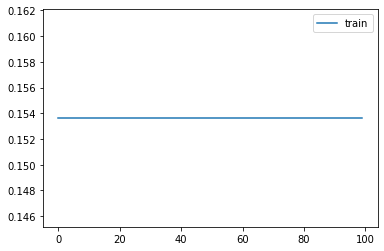

Epoch 1/100
97/97 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1165
Epoch 2/100
97/97 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1165
Epoch 3/100
97/97 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1165
Epoch 4/100
97/97 [==============================] - 4s 38ms/step - loss: nan - acc: 0.1165
Epoch 5/100
97/97 [==============================] - 4s 37ms/step - loss: nan - acc: 0.1165
Epoch 6/100
97/97 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1165
Epoch 7/100
97/97 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1165
Epoch 8/100
97/97 [==============================] - 4s 37ms/step - loss: nan - acc: 0.1165
Epoch 9/100
97/97 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1165
Epoch 10/100
97/97 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1165
Epoch 11/100
97/97 [==============================] - 4s 36ms/step - loss: nan 

Epoch 89/100
97/97 [==============================] - 4s 44ms/step - loss: nan - acc: 0.1165
Epoch 90/100
97/97 [==============================] - 4s 45ms/step - loss: nan - acc: 0.1165
Epoch 91/100
97/97 [==============================] - 4s 46ms/step - loss: nan - acc: 0.1165
Epoch 92/100
97/97 [==============================] - 4s 42ms/step - loss: nan - acc: 0.1165
Epoch 93/100
97/97 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1165
Epoch 94/100
97/97 [==============================] - 4s 38ms/step - loss: nan - acc: 0.1165
Epoch 95/100
97/97 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1165
Epoch 96/100
97/97 [==============================] - 4s 36ms/step - loss: nan - acc: 0.1165
Epoch 97/100
97/97 [==============================] - 4s 38ms/step - loss: nan - acc: 0.1165
Epoch 98/100
97/97 [==============================] - 4s 39ms/step - loss: nan - acc: 0.1165
Epoch 99/100
97/97 [==============================] - 3s 36ms/step - l

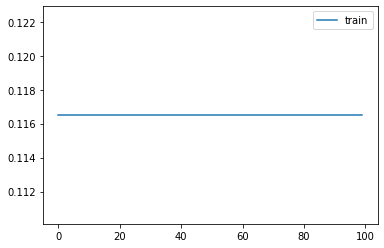

Epoch 1/100
77/77 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1358
Epoch 2/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1358
Epoch 3/100
77/77 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1358
Epoch 4/100
77/77 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1358
Epoch 5/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1358
Epoch 6/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1358
Epoch 7/100
77/77 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1358
Epoch 8/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1358
Epoch 9/100
77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1358
Epoch 10/100
77/77 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1358
Epoch 11/100
77/77 [==============================] - 3s 33ms/step - loss: nan 

Epoch 89/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1358
Epoch 90/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1358
Epoch 91/100
77/77 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1358
Epoch 92/100
77/77 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1358
Epoch 93/100
77/77 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1358
Epoch 94/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1358
Epoch 95/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1358
Epoch 96/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1358
Epoch 97/100
77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1358
Epoch 98/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1358
Epoch 99/100
77/77 [==============================] - 3s 35ms/step - l

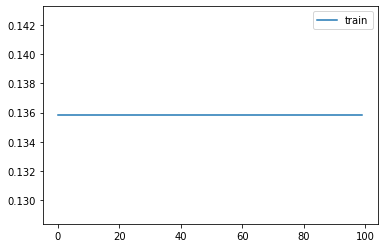

Epoch 1/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.2107 0s - loss:
Epoch 2/100
77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2107
Epoch 3/100
77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2107
Epoch 4/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.2107
Epoch 5/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.2107
Epoch 6/100
77/77 [==============================] - 3s 35ms/step - loss: nan - acc: 0.2107
Epoch 7/100
77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2107
Epoch 8/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.2107
Epoch 9/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.2107
Epoch 10/100
77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2107
Epoch 11/100
77/77 [==============================] - 3s 37ms/step -

77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2107
Epoch 90/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.2107
Epoch 91/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.2107
Epoch 92/100
77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2107
Epoch 93/100
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.2107
Epoch 94/100
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.2107
Epoch 95/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.2107 0s - loss: nan - a
Epoch 96/100
77/77 [==============================] - 3s 44ms/step - loss: nan - acc: 0.2107
Epoch 97/100
77/77 [==============================] - 4s 46ms/step - loss: nan - acc: 0.2107
Epoch 98/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.2107
Epoch 99/100
77/77 [==============================] - 3s 42ms/st

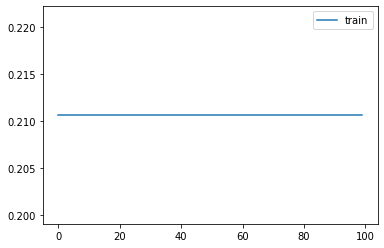

Epoch 1/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1627
Epoch 2/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1627
Epoch 3/100
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1627
Epoch 4/100
77/77 [==============================] - 3s 45ms/step - loss: nan - acc: 0.1627
Epoch 5/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1627
Epoch 6/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1627
Epoch 7/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.1627
Epoch 8/100
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1627
Epoch 9/100
77/77 [==============================] - 3s 38ms/step - loss: nan - acc: 0.1627
Epoch 10/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.1627
Epoch 11/100
77/77 [==============================] - 3s 40ms/step - loss: nan 

77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1627
Epoch 89/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.1627
Epoch 90/100
77/77 [==============================] - 3s 38ms/step - loss: nan - acc: 0.1627
Epoch 91/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1627
Epoch 92/100
77/77 [==============================] - 3s 38ms/step - loss: nan - acc: 0.1627
Epoch 93/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1627
Epoch 94/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1627
Epoch 95/100
77/77 [==============================] - 3s 38ms/step - loss: nan - acc: 0.1627
Epoch 96/100
77/77 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1627
Epoch 97/100
77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1627
Epoch 98/100
77/77 [==============================] - 3s 40ms/step - loss: nan - ac

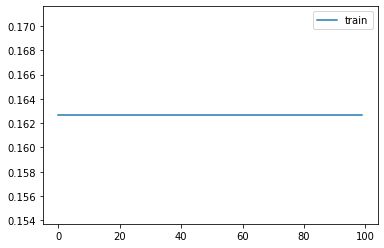

Epoch 1/100
93/93 [==============================] - 4s 38ms/step - loss: nan - acc: 0.1367
Epoch 2/100
93/93 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1367
Epoch 3/100
93/93 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1367
Epoch 4/100
93/93 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1367
Epoch 5/100
93/93 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1367
Epoch 6/100
93/93 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1367
Epoch 7/100
93/93 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1367
Epoch 8/100
93/93 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1367
Epoch 9/100
93/93 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1367
Epoch 10/100
93/93 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1367
Epoch 11/100
93/93 [==============================] - 3s 36ms/step - loss: nan 

93/93 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1367
Epoch 90/100
93/93 [==============================] - 4s 39ms/step - loss: nan - acc: 0.1367
Epoch 91/100
93/93 [==============================] - 4s 39ms/step - loss: nan - acc: 0.1367
Epoch 92/100
93/93 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1367
Epoch 93/100
93/93 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1367
Epoch 94/100
93/93 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1367
Epoch 95/100
93/93 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1367
Epoch 96/100
93/93 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1367
Epoch 97/100
93/93 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1367
Epoch 98/100
93/93 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1367
Epoch 99/100
93/93 [==============================] - 3s 35ms/step - loss: nan - ac

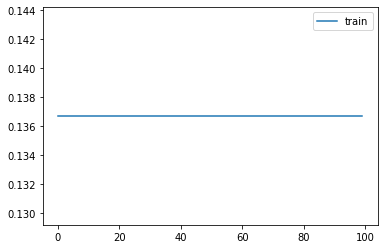

Epoch 1/100
58/58 [==============================] - 2s 33ms/step - loss: nan - acc: 0.1502
Epoch 2/100
58/58 [==============================] - 2s 36ms/step - loss: nan - acc: 0.1502
Epoch 3/100
58/58 [==============================] - 2s 36ms/step - loss: nan - acc: 0.1502
Epoch 4/100
58/58 [==============================] - 2s 35ms/step - loss: nan - acc: 0.1502
Epoch 5/100
58/58 [==============================] - 2s 36ms/step - loss: nan - acc: 0.1502
Epoch 6/100
58/58 [==============================] - 2s 36ms/step - loss: nan - acc: 0.1502
Epoch 7/100
58/58 [==============================] - 2s 36ms/step - loss: nan - acc: 0.1502
Epoch 8/100
58/58 [==============================] - 2s 35ms/step - loss: nan - acc: 0.1502
Epoch 9/100
58/58 [==============================] - 2s 34ms/step - loss: nan - acc: 0.1502
Epoch 10/100
58/58 [==============================] - 2s 33ms/step - loss: nan - acc: 0.1502
Epoch 11/100
58/58 [==============================] - 2s 35ms/step - loss: nan 

58/58 [==============================] - 2s 41ms/step - loss: nan - acc: 0.1502
Epoch 89/100
58/58 [==============================] - 2s 39ms/step - loss: nan - acc: 0.1502
Epoch 90/100
58/58 [==============================] - 2s 35ms/step - loss: nan - acc: 0.1502
Epoch 91/100
58/58 [==============================] - 2s 34ms/step - loss: nan - acc: 0.1502
Epoch 92/100
58/58 [==============================] - 2s 37ms/step - loss: nan - acc: 0.1502
Epoch 93/100
58/58 [==============================] - 2s 43ms/step - loss: nan - acc: 0.1502
Epoch 94/100
58/58 [==============================] - 3s 45ms/step - loss: nan - acc: 0.1502
Epoch 95/100
58/58 [==============================] - 2s 42ms/step - loss: nan - acc: 0.1502
Epoch 96/100
58/58 [==============================] - 3s 46ms/step - loss: nan - acc: 0.1502
Epoch 97/100
58/58 [==============================] - 3s 49ms/step - loss: nan - acc: 0.1502
Epoch 98/100
58/58 [==============================] - 3s 45ms/step - loss: nan - ac

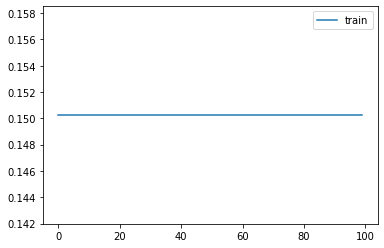

Epoch 1/100
85/85 [==============================] - 4s 46ms/step - loss: nan - acc: 0.1081
Epoch 2/100
85/85 [==============================] - 4s 43ms/step - loss: nan - acc: 0.1081
Epoch 3/100
85/85 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1081
Epoch 4/100
85/85 [==============================] - 3s 38ms/step - loss: nan - acc: 0.1081
Epoch 5/100
85/85 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1081
Epoch 6/100
85/85 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1081
Epoch 7/100
85/85 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1081
Epoch 8/100
85/85 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1081
Epoch 9/100
85/85 [==============================] - 4s 43ms/step - loss: nan - acc: 0.1081
Epoch 10/100
85/85 [==============================] - 4s 46ms/step - loss: nan - acc: 0.1081
Epoch 11/100
85/85 [==============================] - 3s 38ms/step - loss: nan 

Epoch 89/100
85/85 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1081
Epoch 90/100
85/85 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1081
Epoch 91/100
85/85 [==============================] - 3s 38ms/step - loss: nan - acc: 0.1081
Epoch 92/100
85/85 [==============================] - 3s 38ms/step - loss: nan - acc: 0.1081
Epoch 93/100
85/85 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1081
Epoch 94/100
85/85 [==============================] - 3s 38ms/step - loss: nan - acc: 0.1081
Epoch 95/100
85/85 [==============================] - 3s 38ms/step - loss: nan - acc: 0.1081
Epoch 96/100
85/85 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1081
Epoch 97/100
85/85 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1081
Epoch 98/100
85/85 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1081
Epoch 99/100
85/85 [==============================] - 3s 41ms/step - l

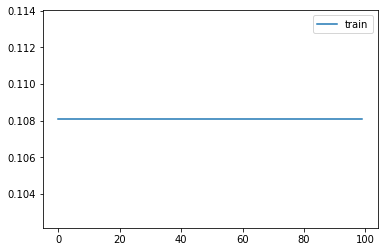

Epoch 1/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1631
Epoch 2/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1631
Epoch 3/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.1631
Epoch 4/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.1631
Epoch 5/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.1631
Epoch 6/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1631
Epoch 7/100
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1631
Epoch 8/100
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1631 1s - loss: nan - a - ETA: 0s -
Epoch 9/100
77/77 [==============================] - 3s 38ms/step - loss: nan - acc: 0.1631
Epoch 10/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.1631
Epoch 11/100
77/77 [============================

77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1631
Epoch 89/100
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1631
Epoch 90/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1631
Epoch 91/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1631
Epoch 92/100
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1631
Epoch 93/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1631
Epoch 94/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1631
Epoch 95/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.1631
Epoch 96/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1631
Epoch 97/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1631
Epoch 98/100
77/77 [==============================] - 4s 46ms/step - loss: nan - ac

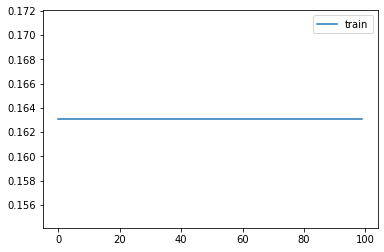

Epoch 1/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.2229
Epoch 2/100
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.2229
Epoch 3/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.2229
Epoch 4/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.2229
Epoch 5/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.2229
Epoch 6/100
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.2229
Epoch 7/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.2229
Epoch 8/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.2229
Epoch 9/100
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.2229
Epoch 10/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.2229
Epoch 11/100
77/77 [==============================] - 3s 40ms/step - loss: nan 

77/77 [==============================] - 3s 45ms/step - loss: nan - acc: 0.2229
Epoch 90/100
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.2229
Epoch 91/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.2229
Epoch 92/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.2229
Epoch 93/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.2229
Epoch 94/100
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.2229 0s - l
Epoch 95/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.2229
Epoch 96/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.2229
Epoch 97/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.2229
Epoch 98/100
77/77 [==============================] - 3s 38ms/step - loss: nan - acc: 0.2229
Epoch 99/100
77/77 [==============================] - 3s 42ms/step - loss: n

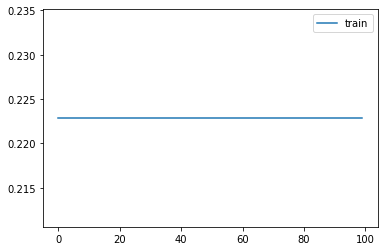

Epoch 1/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1553
Epoch 2/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1553
Epoch 3/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1553
Epoch 4/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1553
Epoch 5/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1553
Epoch 6/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1553
Epoch 7/100
77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1553
Epoch 8/100
77/77 [==============================] - 3s 38ms/step - loss: nan - acc: 0.1553
Epoch 9/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1553
Epoch 10/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.1553
Epoch 11/100
77/77 [==============================] - 3s 40ms/step - loss: nan 

77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1553
Epoch 89/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1553
Epoch 90/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1553
Epoch 91/100
77/77 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1553
Epoch 92/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.1553
Epoch 93/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1553
Epoch 94/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1553
Epoch 95/100
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1553
Epoch 96/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1553
Epoch 97/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1553
Epoch 98/100
77/77 [==============================] - 3s 40ms/step - loss: nan - ac

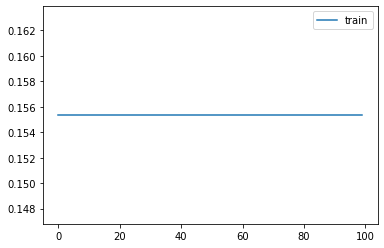

Epoch 1/100
81/81 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1420
Epoch 2/100
81/81 [==============================] - 3s 39ms/step - loss: nan - acc: 0.1420
Epoch 3/100
81/81 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1420
Epoch 4/100
81/81 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1420
Epoch 5/100
81/81 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1420
Epoch 6/100
81/81 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1420
Epoch 7/100
81/81 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1420
Epoch 8/100
81/81 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1420
Epoch 9/100
81/81 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1420
Epoch 10/100
81/81 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1420
Epoch 11/100
81/81 [==============================] - 3s 40ms/step - loss: nan 

81/81 [==============================] - 3s 39ms/step - loss: nan - acc: 0.1420
Epoch 90/100
81/81 [==============================] - 3s 39ms/step - loss: nan - acc: 0.1420
Epoch 91/100
81/81 [==============================] - 3s 39ms/step - loss: nan - acc: 0.1420
Epoch 92/100
81/81 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1420
Epoch 93/100
81/81 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1420
Epoch 94/100
81/81 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1420
Epoch 95/100
81/81 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1420
Epoch 96/100
81/81 [==============================] - 3s 39ms/step - loss: nan - acc: 0.1420
Epoch 97/100
81/81 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1420
Epoch 98/100
81/81 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1420
Epoch 99/100
81/81 [==============================] - 3s 39ms/step - loss: nan - ac

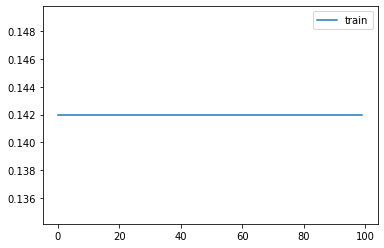

Epoch 1/100
56/56 [==============================] - 2s 39ms/step - loss: nan - acc: 0.1665
Epoch 2/100
56/56 [==============================] - 2s 42ms/step - loss: nan - acc: 0.1665
Epoch 3/100
56/56 [==============================] - 2s 40ms/step - loss: nan - acc: 0.1665
Epoch 4/100
56/56 [==============================] - 2s 39ms/step - loss: nan - acc: 0.1665
Epoch 5/100
56/56 [==============================] - 2s 39ms/step - loss: nan - acc: 0.1665
Epoch 6/100
56/56 [==============================] - 2s 42ms/step - loss: nan - acc: 0.1665 0s - l
Epoch 7/100
56/56 [==============================] - 2s 41ms/step - loss: nan - acc: 0.1665
Epoch 8/100
56/56 [==============================] - 2s 41ms/step - loss: nan - acc: 0.1665
Epoch 9/100
56/56 [==============================] - 2s 44ms/step - loss: nan - acc: 0.1665
Epoch 10/100
56/56 [==============================] - 2s 39ms/step - loss: nan - acc: 0.1665
Epoch 11/100
56/56 [==============================] - 2s 40ms/step - los

56/56 [==============================] - 2s 39ms/step - loss: nan - acc: 0.1665
Epoch 90/100
56/56 [==============================] - 2s 40ms/step - loss: nan - acc: 0.1665
Epoch 91/100
56/56 [==============================] - 2s 40ms/step - loss: nan - acc: 0.1665
Epoch 92/100
56/56 [==============================] - 2s 39ms/step - loss: nan - acc: 0.1665
Epoch 93/100
56/56 [==============================] - 2s 38ms/step - loss: nan - acc: 0.1665
Epoch 94/100
56/56 [==============================] - 2s 38ms/step - loss: nan - acc: 0.1665
Epoch 95/100
56/56 [==============================] - 2s 39ms/step - loss: nan - acc: 0.1665
Epoch 96/100
56/56 [==============================] - 2s 39ms/step - loss: nan - acc: 0.1665
Epoch 97/100
56/56 [==============================] - 2s 38ms/step - loss: nan - acc: 0.1665
Epoch 98/100
56/56 [==============================] - 2s 39ms/step - loss: nan - acc: 0.1665
Epoch 99/100
56/56 [==============================] - 2s 40ms/step - loss: nan - ac

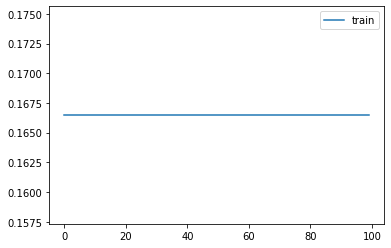

Epoch 1/100
76/76 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1205
Epoch 2/100
76/76 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1205
Epoch 3/100
76/76 [==============================] - 3s 46ms/step - loss: nan - acc: 0.1205
Epoch 4/100
76/76 [==============================] - 4s 49ms/step - loss: nan - acc: 0.1205 0s - los
Epoch 5/100
76/76 [==============================] - 3s 44ms/step - loss: nan - acc: 0.1205
Epoch 6/100
76/76 [==============================] - 3s 45ms/step - loss: nan - acc: 0.1205 0s - loss: nan
Epoch 7/100
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205
Epoch 8/100
76/76 [==============================] - 3s 44ms/step - loss: nan - acc: 0.1205
Epoch 9/100
76/76 [==============================] - 3s 46ms/step - loss: nan - acc: 0.1205
Epoch 10/100
76/76 [==============================] - 3s 45ms/step - loss: nan - acc: 0.1205
Epoch 11/100
76/76 [==============================] - 3

76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205
Epoch 89/100
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205
Epoch 90/100
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205
Epoch 91/100
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205
Epoch 92/100
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205
Epoch 93/100
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205
Epoch 94/100
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205
Epoch 95/100
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205
Epoch 96/100
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205
Epoch 97/100
76/76 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1205
Epoch 98/100
76/76 [==============================] - 3s 43ms/step - loss: nan - ac

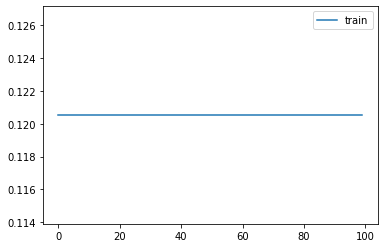

Epoch 1/100
80/80 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1399
Epoch 2/100
80/80 [==============================] - 3s 40ms/step - loss: nan - acc: 0.1399
Epoch 3/100
80/80 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1399
Epoch 4/100
80/80 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1399
Epoch 5/100
80/80 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1399
Epoch 6/100
80/80 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1399 0s - loss: nan
Epoch 7/100
80/80 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1399
Epoch 8/100
80/80 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1399
Epoch 9/100
80/80 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1399
Epoch 10/100
80/80 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1399 0s - loss:
Epoch 11/100
80/80 [==============================] -

80/80 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1399
Epoch 88/100
80/80 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1399
Epoch 89/100
80/80 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1399 1s - l - ETA: 0s - loss:
Epoch 90/100
80/80 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1399
Epoch 91/100
80/80 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1399
Epoch 92/100
80/80 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1399
Epoch 93/100
80/80 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1399 0s - loss: nan - a
Epoch 94/100
80/80 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1399
Epoch 95/100
80/80 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1399
Epoch 96/100
80/80 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1399
Epoch 97/100
80/80 [===================

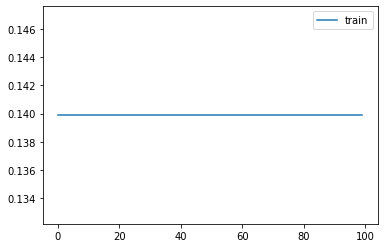

Epoch 1/100
96/96 [==============================] - 4s 43ms/step - loss: nan - acc: 0.1675
Epoch 2/100
96/96 [==============================] - 4s 45ms/step - loss: nan - acc: 0.1675
Epoch 3/100
96/96 [==============================] - 4s 43ms/step - loss: nan - acc: 0.1675
Epoch 4/100
96/96 [==============================] - 4s 43ms/step - loss: nan - acc: 0.1675
Epoch 5/100
96/96 [==============================] - 4s 43ms/step - loss: nan - acc: 0.1675
Epoch 6/100
96/96 [==============================] - 4s 43ms/step - loss: nan - acc: 0.1675
Epoch 7/100
96/96 [==============================] - 4s 44ms/step - loss: nan - acc: 0.1675
Epoch 8/100
96/96 [==============================] - 4s 43ms/step - loss: nan - acc: 0.1675
Epoch 9/100
96/96 [==============================] - 4s 43ms/step - loss: nan - acc: 0.1675
Epoch 10/100
96/96 [==============================] - 4s 47ms/step - loss: nan - acc: 0.1675
Epoch 11/100
96/96 [==============================] - 5s 47ms/step - loss: nan 

96/96 [==============================] - 4s 42ms/step - loss: nan - acc: 0.1675
Epoch 89/100
96/96 [==============================] - 4s 42ms/step - loss: nan - acc: 0.1675
Epoch 90/100
96/96 [==============================] - 4s 42ms/step - loss: nan - acc: 0.1675
Epoch 91/100
96/96 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1675
Epoch 92/100
96/96 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1675
Epoch 93/100
96/96 [==============================] - 4s 42ms/step - loss: nan - acc: 0.1675
Epoch 94/100
96/96 [==============================] - 4s 42ms/step - loss: nan - acc: 0.1675
Epoch 95/100
96/96 [==============================] - 4s 42ms/step - loss: nan - acc: 0.1675
Epoch 96/100
96/96 [==============================] - 4s 41ms/step - loss: nan - acc: 0.1675
Epoch 97/100
96/96 [==============================] - 4s 42ms/step - loss: nan - acc: 0.1675
Epoch 98/100
96/96 [==============================] - 4s 41ms/step - loss: nan - ac

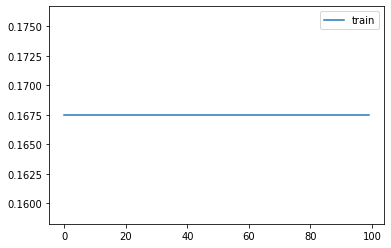

Epoch 1/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1037
Epoch 2/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1037
Epoch 3/100
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1037
Epoch 4/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1037
Epoch 5/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1037
Epoch 6/100
77/77 [==============================] - 3s 44ms/step - loss: nan - acc: 0.1037
Epoch 7/100
77/77 [==============================] - 3s 41ms/step - loss: nan - acc: 0.1037
Epoch 8/100
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1037
Epoch 9/100
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1037
Epoch 10/100
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1037
Epoch 11/100
77/77 [==============================] - 3s 42ms/step - loss: nan 

77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1037
Epoch 89/100
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1037 0s - loss: n
Epoch 90/100
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1037
Epoch 91/100
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1037
Epoch 92/100
77/77 [==============================] - 3s 42ms/step - loss: nan - acc: 0.1037
Epoch 93/100
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1037
Epoch 94/100
77/77 [==============================] - 3s 44ms/step - loss: nan - acc: 0.1037
Epoch 95/100
77/77 [==============================] - 3s 44ms/step - loss: nan - acc: 0.1037
Epoch 96/100
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1037
Epoch 97/100
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.1037
Epoch 98/100
77/77 [==============================] - 3s 44ms/step - l

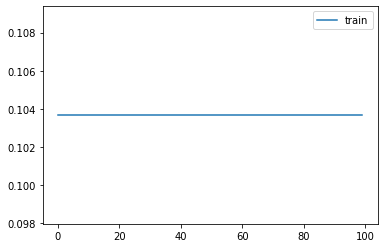

Epoch 1/100
75/75 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0358
Epoch 2/100
75/75 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0358
Epoch 3/100
75/75 [==============================] - 3s 44ms/step - loss: nan - acc: 0.0358
Epoch 4/100
75/75 [==============================] - 3s 42ms/step - loss: nan - acc: 0.0358
Epoch 5/100
75/75 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0358
Epoch 6/100
75/75 [==============================] - 3s 44ms/step - loss: nan - acc: 0.0358
Epoch 7/100
75/75 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0358
Epoch 8/100
75/75 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0358
Epoch 9/100
75/75 [==============================] - 3s 45ms/step - loss: nan - acc: 0.0358
Epoch 10/100
75/75 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0358
Epoch 11/100
75/75 [==============================] - 3s 43ms/step - loss: nan 

75/75 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0358
Epoch 90/100
75/75 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0358
Epoch 91/100
75/75 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0358
Epoch 92/100
75/75 [==============================] - 3s 38ms/step - loss: nan - acc: 0.0358
Epoch 93/100
75/75 [==============================] - 3s 38ms/step - loss: nan - acc: 0.0358
Epoch 94/100
75/75 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0358
Epoch 95/100
75/75 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0358
Epoch 96/100
75/75 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0358
Epoch 97/100
75/75 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0358
Epoch 98/100
75/75 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0358
Epoch 99/100
75/75 [==============================] - 3s 37ms/step - loss: nan - ac

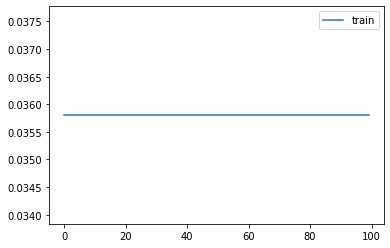

Epoch 1/100
82/82 [==============================] - 3s 38ms/step - loss: nan - acc: 0.1250
Epoch 2/100
82/82 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1250
Epoch 3/100
82/82 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1250
Epoch 4/100
82/82 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1250
Epoch 5/100
82/82 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1250
Epoch 6/100
82/82 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1250
Epoch 7/100
82/82 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1250
Epoch 8/100
82/82 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1250
Epoch 9/100
82/82 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1250
Epoch 10/100
82/82 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1250
Epoch 11/100
82/82 [==============================] - 3s 35ms/step - loss: nan 

82/82 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1250
Epoch 90/100
82/82 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1250
Epoch 91/100
82/82 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1250
Epoch 92/100
82/82 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1250
Epoch 93/100
82/82 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1250
Epoch 94/100
82/82 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1250
Epoch 95/100
82/82 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1250
Epoch 96/100
82/82 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1250
Epoch 97/100
82/82 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1250
Epoch 98/100
82/82 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1250
Epoch 99/100
82/82 [==============================] - 3s 34ms/step - loss: nan - ac

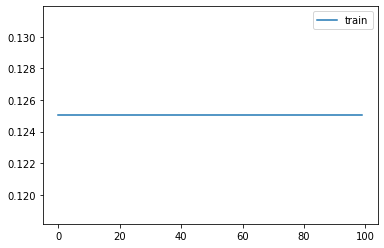

Epoch 1/100
93/93 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1029
Epoch 2/100
93/93 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1029
Epoch 3/100
93/93 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1029
Epoch 4/100
93/93 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1029
Epoch 5/100
93/93 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1029
Epoch 6/100
93/93 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1029
Epoch 7/100
93/93 [==============================] - 4s 39ms/step - loss: nan - acc: 0.1029
Epoch 8/100
93/93 [==============================] - 4s 38ms/step - loss: nan - acc: 0.1029
Epoch 9/100
93/93 [==============================] - 4s 39ms/step - loss: nan - acc: 0.1029
Epoch 10/100
93/93 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1029
Epoch 11/100
93/93 [==============================] - 3s 36ms/step - loss: nan 

93/93 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1029
Epoch 90/100
93/93 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1029
Epoch 91/100
93/93 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1029
Epoch 92/100
93/93 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1029
Epoch 93/100
93/93 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1029
Epoch 94/100
93/93 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1029
Epoch 95/100
93/93 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1029
Epoch 96/100
93/93 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1029
Epoch 97/100
93/93 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1029
Epoch 98/100
93/93 [==============================] - 3s 37ms/step - loss: nan - acc: 0.1029
Epoch 99/100
93/93 [==============================] - 3s 38ms/step - loss: nan - ac

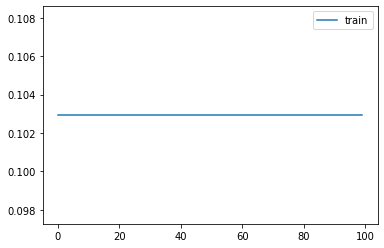

Epoch 1/100
72/72 [==============================] - 3s 38ms/step - loss: nan - acc: 0.2114
Epoch 2/100
72/72 [==============================] - 3s 35ms/step - loss: nan - acc: 0.2114
Epoch 3/100
72/72 [==============================] - 2s 34ms/step - loss: nan - acc: 0.2114
Epoch 4/100
72/72 [==============================] - 3s 36ms/step - loss: nan - acc: 0.2114
Epoch 5/100
72/72 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2114
Epoch 6/100
72/72 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2114
Epoch 7/100
72/72 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2114
Epoch 8/100
72/72 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2114
Epoch 9/100
72/72 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2114
Epoch 10/100
72/72 [==============================] - 3s 35ms/step - loss: nan - acc: 0.2114
Epoch 11/100
72/72 [==============================] - 3s 36ms/step - loss: nan 

72/72 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2114
Epoch 90/100
72/72 [==============================] - 2s 34ms/step - loss: nan - acc: 0.2114
Epoch 91/100
72/72 [==============================] - 2s 34ms/step - loss: nan - acc: 0.2114
Epoch 92/100
72/72 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2114
Epoch 93/100
72/72 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2114
Epoch 94/100
72/72 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2114
Epoch 95/100
72/72 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2114
Epoch 96/100
72/72 [==============================] - 3s 37ms/step - loss: nan - acc: 0.2114
Epoch 97/100
72/72 [==============================] - 3s 36ms/step - loss: nan - acc: 0.2114
Epoch 98/100
72/72 [==============================] - 2s 34ms/step - loss: nan - acc: 0.2114
Epoch 99/100
72/72 [==============================] - 3s 35ms/step - loss: nan - ac

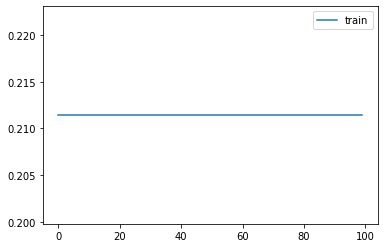

Epoch 1/100
77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0919
Epoch 2/100
77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0919
Epoch 3/100
77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0919
Epoch 4/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0919
Epoch 5/100
77/77 [==============================] - 3s 34ms/step - loss: nan - acc: 0.0919
Epoch 6/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0919
Epoch 7/100
77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0919
Epoch 8/100
77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0919
Epoch 9/100
77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0919
Epoch 10/100
77/77 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0919
Epoch 11/100
77/77 [==============================] - 3s 37ms/step - loss: nan 

77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0919
Epoch 90/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.0919
Epoch 91/100
77/77 [==============================] - 3s 43ms/step - loss: nan - acc: 0.0919
Epoch 92/100
77/77 [==============================] - 3s 39ms/step - loss: nan - acc: 0.0919
Epoch 93/100
77/77 [==============================] - 3s 38ms/step - loss: nan - acc: 0.0919
Epoch 94/100
77/77 [==============================] - 3s 38ms/step - loss: nan - acc: 0.0919
Epoch 95/100
77/77 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0919
Epoch 96/100
77/77 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0919
Epoch 97/100
77/77 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0919
Epoch 98/100
77/77 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0919
Epoch 99/100
77/77 [==============================] - 3s 36ms/step - loss: nan - ac

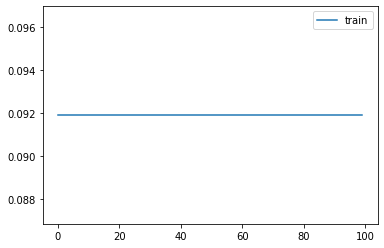

Epoch 1/100
83/83 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0287
Epoch 2/100
83/83 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0287
Epoch 3/100
83/83 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0287
Epoch 4/100
83/83 [==============================] - 3s 34ms/step - loss: nan - acc: 0.0287
Epoch 5/100
83/83 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0287
Epoch 6/100
83/83 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0287
Epoch 7/100
83/83 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0287
Epoch 8/100
83/83 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0287
Epoch 9/100
83/83 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0287
Epoch 10/100
83/83 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0287
Epoch 11/100
83/83 [==============================] - 3s 33ms/step - loss: nan 

83/83 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0287
Epoch 90/100
83/83 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0287
Epoch 91/100
83/83 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0287
Epoch 92/100
83/83 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0287
Epoch 93/100
83/83 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0287
Epoch 94/100
83/83 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0287
Epoch 95/100
83/83 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0287
Epoch 96/100
83/83 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0287
Epoch 97/100
83/83 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0287
Epoch 98/100
83/83 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0287
Epoch 99/100
83/83 [==============================] - 3s 34ms/step - loss: nan - ac

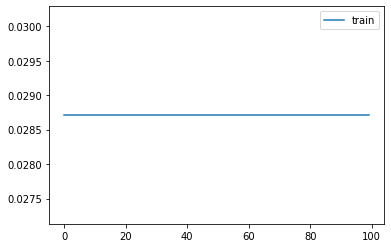

Epoch 1/100
96/96 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1490
Epoch 2/100
96/96 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1490
Epoch 3/100
96/96 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1490
Epoch 4/100
96/96 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1490
Epoch 5/100
96/96 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1490
Epoch 6/100
96/96 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1490
Epoch 7/100
96/96 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1490
Epoch 8/100
96/96 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1490
Epoch 9/100
96/96 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1490
Epoch 10/100
96/96 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1490
Epoch 11/100
96/96 [==============================] - 3s 34ms/step - loss: nan 

96/96 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1490
Epoch 90/100
96/96 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1490
Epoch 91/100
96/96 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1490
Epoch 92/100
96/96 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1490
Epoch 93/100
96/96 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1490
Epoch 94/100
96/96 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1490
Epoch 95/100
96/96 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1490
Epoch 96/100
96/96 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1490
Epoch 97/100
96/96 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1490
Epoch 98/100
96/96 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1490
Epoch 99/100
96/96 [==============================] - 3s 36ms/step - loss: nan - ac

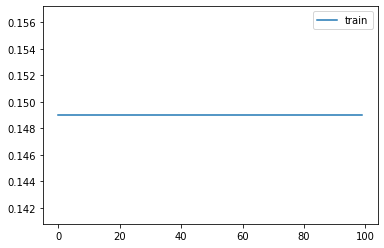

Epoch 1/100
89/89 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0920
Epoch 2/100
89/89 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0920
Epoch 3/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0920
Epoch 4/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0920
Epoch 5/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0920
Epoch 6/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0920
Epoch 7/100
89/89 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0920
Epoch 8/100
89/89 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0920
Epoch 9/100
89/89 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0920
Epoch 10/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0920
Epoch 11/100
89/89 [==============================] - 3s 36ms/step - loss: nan 

89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0920
Epoch 90/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0920
Epoch 91/100
89/89 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0920
Epoch 92/100
89/89 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0920
Epoch 93/100
89/89 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0920
Epoch 94/100
89/89 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0920
Epoch 95/100
89/89 [==============================] - 3s 35ms/step - loss: nan - acc: 0.0920
Epoch 96/100
89/89 [==============================] - 3s 37ms/step - loss: nan - acc: 0.0920
Epoch 97/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0920
Epoch 98/100
89/89 [==============================] - 3s 36ms/step - loss: nan - acc: 0.0920
Epoch 99/100
89/89 [==============================] - 3s 34ms/step - loss: nan - ac

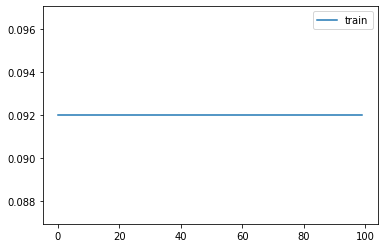

Epoch 1/100
78/78 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1612
Epoch 2/100
78/78 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1612
Epoch 3/100
78/78 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1612
Epoch 4/100
78/78 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1612
Epoch 5/100
78/78 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1612
Epoch 6/100
78/78 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1612
Epoch 7/100
78/78 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1612
Epoch 8/100
78/78 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1612
Epoch 9/100
78/78 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1612
Epoch 10/100
78/78 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1612
Epoch 11/100
78/78 [==============================] - 3s 35ms/step - loss: nan 

78/78 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1612
Epoch 89/100
78/78 [==============================] - 3s 34ms/step - loss: nan - acc: 0.1612
Epoch 90/100
78/78 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1612
Epoch 91/100
78/78 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1612
Epoch 92/100
78/78 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1612
Epoch 93/100
78/78 [==============================] - 3s 36ms/step - loss: nan - acc: 0.1612
Epoch 94/100
78/78 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1612
Epoch 95/100
78/78 [==============================] - 3s 35ms/step - loss: nan - acc: 0.1612
Epoch 96/100
78/78 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1612
Epoch 97/100
78/78 [==============================] - 3s 33ms/step - loss: nan - acc: 0.1612
Epoch 98/100
78/78 [==============================] - 3s 35ms/step - loss: nan - ac

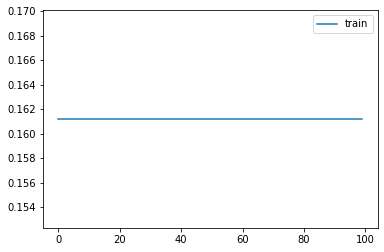

Epoch 1/100
80/80 [==============================] - 2s 29ms/step - loss: nan - acc: 0.1605
Epoch 2/100
80/80 [==============================] - 2s 29ms/step - loss: nan - acc: 0.1605
Epoch 3/100
80/80 [==============================] - 2s 29ms/step - loss: nan - acc: 0.1605
Epoch 4/100
80/80 [==============================] - 2s 30ms/step - loss: nan - acc: 0.1605
Epoch 5/100
80/80 [==============================] - 3s 32ms/step - loss: nan - acc: 0.1605
Epoch 6/100
80/80 [==============================] - 3s 31ms/step - loss: nan - acc: 0.1605
Epoch 7/100
80/80 [==============================] - 2s 31ms/step - loss: nan - acc: 0.1605
Epoch 8/100
80/80 [==============================] - 2s 31ms/step - loss: nan - acc: 0.1605
Epoch 9/100
80/80 [==============================] - 2s 31ms/step - loss: nan - acc: 0.1605
Epoch 10/100
80/80 [==============================] - 2s 29ms/step - loss: nan - acc: 0.1605
Epoch 11/100
80/80 [==============================] - 2s 29ms/step - loss: nan 

80/80 [==============================] - 2s 30ms/step - loss: nan - acc: 0.1605
Epoch 89/100
80/80 [==============================] - 3s 31ms/step - loss: nan - acc: 0.1605
Epoch 90/100
80/80 [==============================] - 3s 31ms/step - loss: nan - acc: 0.1605
Epoch 91/100
80/80 [==============================] - 3s 31ms/step - loss: nan - acc: 0.1605
Epoch 92/100
80/80 [==============================] - 2s 31ms/step - loss: nan - acc: 0.1605
Epoch 93/100
80/80 [==============================] - 2s 30ms/step - loss: nan - acc: 0.1605
Epoch 94/100
80/80 [==============================] - 2s 29ms/step - loss: nan - acc: 0.1605
Epoch 95/100
80/80 [==============================] - 2s 29ms/step - loss: nan - acc: 0.1605
Epoch 96/100
80/80 [==============================] - 2s 30ms/step - loss: nan - acc: 0.1605
Epoch 97/100
80/80 [==============================] - 3s 31ms/step - loss: nan - acc: 0.1605
Epoch 98/100
80/80 [==============================] - 2s 31ms/step - loss: nan - ac

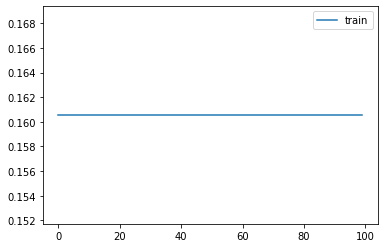

['../../Dataset\\ALB(2003,2015).csv']


In [23]:
errorfile = []
for train_name in range(0,70):
    try:
        df = pd.read_csv(datalist[train_name])
        df = signal_to_catagorical(df)
        df = df[30:]
        x_train = df[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n','AO_n','RSI_n','MA-trend']].values
        x_train = add_shift_day(x_train,30)
        y_train = df['Signal']
        y_train = to_categorical(y_train)
        y_train = y_train.tolist()
        del y_train[0:30]
        y_train = np.array(y_train)

        r = random.randint(0,2)
        val = val_list[1]
        val = signal_to_catagorical(val)
        x_val = val[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n','AO_n','RSI_n','MA-trend']].values
        x_val = add_shift_day(x_val,30)
        y_val = val['Signal']
        y_val = to_categorical(y_val)
        y_val = y_val.tolist()
        del y_val[0:30]
        y_val = np.array(y_val)

        h = model.fit(x_train, y_train, epochs=100,shuffle=False)
        model.save('model_lstm_data'+str(train_name)+'_2.h5')
        plt.plot(h.history['acc'])
        plt.legend(['train'])
        plt.show()
    except:
        errorfile.append(datalist[train_name])
print(errorfile)

In [34]:
model = load_model('model_lstm_data20_2.h5')

In [35]:
for test in test_list:
    # print(test)
    test = signal_to_catagorical(test)
    #   print(test)
    x_test = test[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n','AO_n','RSI_n','MA-trend']].values
    x_test = add_shift_day(x_test,30)
    y_test = test['Signal'].values
    y_test = y_test.tolist()
    del y_test[0:30]
    y_test = np.array(y_test)

    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred,axis = -1)
    y_test = y_test.astype('int64')
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix")
    print(cm)

    
  

Confusion Matrix
[[  23    2  484]
 [   0   23  287]
 [  40   91 1657]]
Confusion Matrix
[[  27   10  444]
 [   2   16  397]
 [  52  187 1517]]


C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Text(0.5, 0, 'Date')

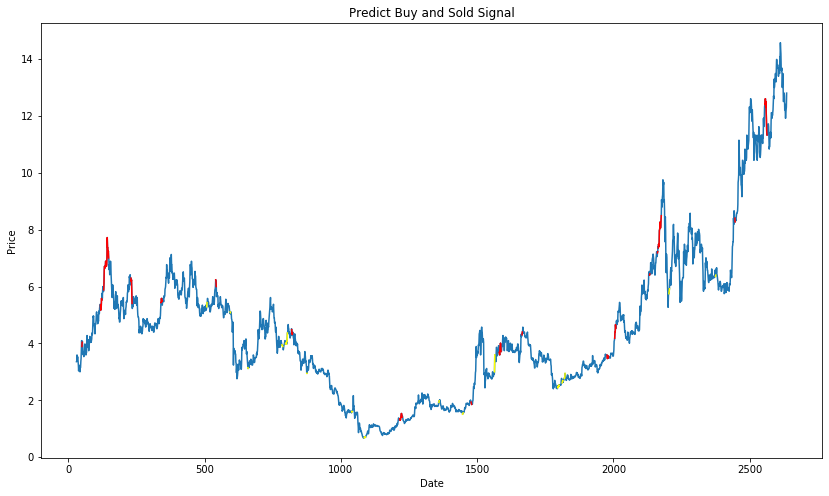

In [36]:
p_test = test_list[0]
p_test = signal_to_catagorical(p_test)
x_test = p_test[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n','AO_n','RSI_n','MA-trend']].values
x_test = add_shift_day(x_test,30)
y_test = p_test['Signal'].values
y_test = y_test.tolist()
del y_test[0:30]
y_test = np.array(y_test)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis = -1)
p_test = p_test.iloc[30:]

p_test['pred'] = y_pred
p_test['pred_b'] = np.where(p_test['pred'] == 0,p_test['Close'],np.nan)
p_test['pred_s'] = np.where(p_test['pred'] == 1,p_test['Close'],np.nan)

plt.figure(figsize=(14,8))
# plt.grid()
plt.title('Predict Buy and Sold Signal')
plt.plot(p_test['Close'])
plt.plot(p_test['pred_b'],color='yellow')
plt.plot(p_test['pred_s'],color='red')
plt.ylabel('Price')
plt.xlabel('Date')